# Exploratory Data Analysis

### On `Mobile money` transactions for `Mara Bank`

## Sections in this notebook.

- Introduction
    - Project Overview
    - Objectives
    - Dataset Background

- Data Importation
    - Import modules
    - Import Datasets
    - Set Global Constants

- Data Description
    - Data Information
    - Dataset Shape and Size
    - Data Types
    - Basic Statistical Summery

- Data Wrangling
    - Missing Values Analysis
    - Outlier Detection
    - Handling Inconsistencies

- Exploratory Analysis
    - Summery Statistics
    - Distribution of Data
    - Spread of Data
    - Trend Analysis
    - Correlation of Features

- Insights and Findings
    - Key Patterns
    - Anomalies
    - Business Insights
    - Recommendations


## Introduction

- Project Overview
- Objectives
- Dataset Background

### Project Overview

Imagine you’re watching millions of transactions flow through `Mara Bank` in Nigeria, like airtime purchases, money transfers, bill payments, all happening in real-time from bustling cities to quiet rural towns.

Hidden in this river of activity are patterns and sometimes, suspicious ripples that could be signs of fraud.

This project is our detective work. We’re diving into `Mara Bank’s` mobile money transaction data to uncover how people really use the `mobile banking` system and prepare the ground for building a `fraud detection model`.

### Project Objective

The Key objectives are:

- Clean the noise: Make sure the transaction data is accurate, consistent, and ready for investigation.

- Spot the patterns: Study trends in location, time, amount, and type of transactions.

### Background of Dataset

The dataset was generated mimicing the different scenerios transactions can occur in Nigeria. It contains transactions of diferrent banks, however we will be focusing on the transactions that belongs to `Mara Bank` for this project.

This dataset contains the following:

- `amount`: The value of the transaction.
- `balance`: The account balance after the transaction.
- `time`: The timestamp of the transaction.
- `holder`: The account number of the transaction's initiator or recipient.
- `kyc`: The kyc level of the account
- `holder_bvn`: The BVN of the transaction's initiator or recipient.
- `holder_bank`: The bank of the related party.
- `related`: The account number or entity related to the transaction (e.g., recipient account, ATM bank).
- `related_bvn`: The BVN of the related party.
- `related_bank`: The bank of the related party.
- `state`, `latitude`, `longitude`: Location details of the transaction.
- `status`: The outcome of the transaction (e.g., 'SUCCESS', 'FAILED').
- `type`: The transaction type (e.g., 'DEBIT', 'CREDIT').
- `category`: The specific class of transaction (e.g., 'OPENING', 'WITHDRAWAL', 'PAYMENT', 'TRANSFER', 'REVERSAL', 'BILL').
- `channel`: The channel used for the transaction (e.g., 'CARD', 'APP', 'USSD').
- `device`: The device used for the transaction (e.g., 'ATM-001', 'MOBILE-003') .
- `nonce`: A unique identifier for related transactions.
- `reported`: Marks reported transactions?

## Data Importation

- Loading Required Libraries
- Reading Data Files
- Initial Data Preview

### Loading required libraries

In [186]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
# Import modules
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [189]:
# Load our custom library
from lib import analyst, engineer

### Reading data files

In [190]:
# Load the transactions dataset for the project 
df = pd.read_csv('../datasets/transactions.csv', parse_dates=['time'])

In [191]:
# Load the accounts dataset for the project 
accounts_df = pd.read_csv('../datasets/accounts.csv')

### Initial data preview

In [192]:
# Preview the dataset
df.head()

amount    balance                       time          holder  \
0   32458.22   32458.22 2024-09-07 09:42:16.133128  ACC_0000000020   
1 9060154.27 9060154.27 2024-09-07 09:49:25.133128  ACC_0000000196   
2    8953.68    8953.68 2024-09-07 09:49:56.133128  ACC_0000000210   
3   12889.66   12889.66 2024-09-07 09:52:06.133128  ACC_0000000263   
4 9724462.31 9724462.31 2024-09-07 09:52:57.133128  ACC_0000000281   

          holder_bvn holder_bank     related related_bvn related_bank  \
0  USER_000000000020  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
1  USER_000000000196  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
2  USER_000000000210  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
3  USER_000000000263  BANK_00000  BANK_00000  BANK_00000   BANK_00000   
4  USER_000000000281  BANK_00000  BANK_00000  BANK_00000   BANK_00000   

       state  latitude  longitude   status    type category channel  \
0     Kaduna     10.54       7.44  SUCCESS  CREDIT  OPENING     APP   
1      Niger      6.47       7.50  SUCCESS  CREDIT  OPENING     APP   
2  Akwa Ibom      6.56       4.23  SUCCESS  CREDIT  OPENING     APP   
3    Katsina     12.99       7.62  SUCCESS  CREDIT  OPENING     APP   
4     Sokoto     13.01       5.23  SUCCESS  CREDIT  OPENING     APP   

               device                  nonce  reported  
0  MOBILE_00020_00001  953858487001905987532     False  
1  MOBILE_00196_00001  685440985787190852952     False  
2  MOBILE_00210_00001  688258551699592298468     False  
3  MOBILE_00263_00001  687216714536206082135     False  
4  MOBILE_00281_00001  325635600518651313685     False

## Data Description

- Missing Values Analysis
- Outlier Detection
- Handling Inconsistencies

### Data Information

Let's have see the data types and shape of our dataset.

In [193]:
# Preview the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213375 entries, 0 to 1213374
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   amount        1213375 non-null  float64       
 1   balance       1213375 non-null  float64       
 2   time          1213375 non-null  datetime64[ns]
 3   holder        1213375 non-null  object        
 4   holder_bvn    1213375 non-null  object        
 5   holder_bank   1213375 non-null  object        
 6   related       1213375 non-null  object        
 7   related_bvn   1213375 non-null  object        
 8   related_bank  1213375 non-null  object        
 9   state         1213375 non-null  object        
 10  latitude      1213375 non-null  float64       
 11  longitude     1213375 non-null  float64       
 12  status        1213375 non-null  object        
 13  type          1213375 non-null  object        
 14  category      1213375 non-null  object        
 15

We have let's of categorical values, this will really help with our classification.

### Dataset shape and size

In [194]:
# Preview the size of the dataset
df.shape

(1213375, 19)

### Dataset Statistics

Lets summarize the dataset using summary statistics.

In [195]:
# Set the format for pandas to display floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Set the theme for our visualization
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")

In [196]:
# Sneak peak statistical summery of the dataset
df.describe()

amount       balance                           time   latitude  \
count   1213375.00    1213375.00                        1213375 1213375.00   
mean    1497323.91   15199709.00  2025-03-08 18:48:28.447233792       8.65   
min           0.15          0.47     2024-09-07 09:41:23.133128       4.80   
25%        6775.70     139632.85  2024-12-07 15:13:44.133127936       6.56   
50%       67399.78    1661745.00  2025-03-08 12:44:41.133127936       8.43   
75%      537820.45   10003536.50  2025-06-08 04:09:48.133127936      10.34   
max   619786180.54 1370141307.00     2025-09-07 09:41:28.133128      13.01   
std     7159417.00   38496616.09                            NaN       2.15   

       longitude  
count 1213375.00  
mean        5.41  
min         3.04  
25%         3.69  
50%         4.76  
75%         7.08  
max        11.21  
std         2.07

Looking at this summary, here are the things that stand out.

`Amount` 
- Mean is 937K while median is around 119K, it skews to the right.
- Max is 202M which is around 300x of 75%; that a huge gap.
- Std is 3.6M while mean is 937K, further confirming the right skew.

`Balance`
- Mean is 1.6M while median is 303K, same skew as amount.
- Max is 233M, has the much gap on the 75% of more than 100x.
- Min is 0, some accounts got drained.

`Time`
- Ranges from Aug 2024 to Aug 2025. 
- So the dataset is for 1 year.
- We will be extracting (Day, Hour, Week, Month...) from it.

`Geo`
- Latitude ranges from 4.7 to 13.01
- Longitude ranges from 3.04 to 11.21
- That's Nigeria's bounding box (Lagos to Maiduguri)
- Mean lat/lon (8.4/5.2), which is central Nigeria.


## Data Cleaning

- Missing Values Analysis
- Handling Inconsistencies
- Outlier Detection

### Missing Values Analysis

In [197]:
# What is the sum of missing values for each column?
df.isnull().sum()

amount          0
balance         0
time            0
holder          0
holder_bvn      0
holder_bank     0
related         0
related_bvn     0
related_bank    0
state           0
latitude        0
longitude       0
status          0
type            0
category        0
channel         0
device          0
nonce           0
reported        0
dtype: int64

Given that this a synthetic data, we didn't think of any reason why data could be missing in bank transactions, if it did, that's trouble 😀

The dataset contains transactions for different banks, we would like the extract the data that we are interested in at this point. The data belonging to `Mara Bank` with the id `BANK_00003`.

In [198]:
# Get the number of banks in the dataset
len(df['holder_bank'].unique())

50

In [199]:
# Let's see the banks in the dataset
df['holder_bank'].value_counts()

holder_bank
BANK_00007    26559
BANK_00006    26203
BANK_00008    26101
BANK_00041    26041
BANK_00011    26040
BANK_00037    25957
BANK_00022    25849
BANK_00002    25705
BANK_00012    25655
BANK_00048    25622
BANK_00010    25584
BANK_00030    25553
BANK_00024    25491
BANK_00049    25450
BANK_00026    25384
BANK_00025    24947
BANK_00013    24905
BANK_00018    24839
BANK_00034    24839
BANK_00038    24793
BANK_00033    24688
BANK_00046    24564
BANK_00027    24542
BANK_00023    24452
BANK_00003    24432
BANK_00005    24355
BANK_00044    24161
BANK_00017    24107
BANK_00032    23965
BANK_00042    23787
BANK_00047    23711
BANK_00035    23621
BANK_00029    23556
BANK_00014    23555
BANK_00036    23435
BANK_00031    23418
BANK_00045    23280
BANK_00015    23248
BANK_00009    23044
BANK_00001    22996
BANK_00028    22990
BANK_00039    22761
BANK_00021    22656
BANK_00040    22634
BANK_00043    22629
BANK_00019    22589
BANK_00020    22443
BANK_00004    22267
BANK_00016    21999
BANK_000

In [200]:
accounts_df

account_no     balance  kyc                bvn     bank_id  \
0      ACC_0000000001   203204.00    1  USER_000000000001  BANK_00010   
1      ACC_0000000002    15654.96    1  USER_000000000002  BANK_00030   
2      ACC_0000000003   392448.79    1  USER_000000000003  BANK_00034   
3      ACC_0000000004    19740.26    1  USER_000000000004  BANK_00013   
4      ACC_0000000005  2100421.00    2  USER_000000000005  BANK_00040   
...               ...         ...  ...                ...         ...   
40989  ACC_0000040990    82080.60    1  USER_000000004691  BANK_00000   
40990  ACC_0000040991 52570766.70    4  USER_000000020937  BANK_00038   
40991  ACC_0000040992    71634.96    1  USER_000000020938  BANK_00026   
40992  ACC_0000040993   290396.95    2  USER_000000010864  BANK_00038   
40993  ACC_0000040994  1433008.92    3  USER_000000018861  BANK_00002   

       merchant    state  latitude  longitude  \
0         False  Plateau      7.35       4.06   
1         False  Bayelsa      7.54       4.75   
2         False     Ogun     10.91       3.68   
3         False    Benue     10.89       4.37   
4         False    Niger      6.46       7.53   
...         ...      ...       ...        ...   
40989     False     Ondo      8.42       5.94   
40990     False  Zamfara      6.18       5.39   
40991     False      FCT      9.19       3.93   
40992     False    Ekiti      6.89       3.61   
40993     False    Lagos      6.49       3.37   

                                            devices      opening_device  
0      ['MOBILE_00001_00001', 'MOBILE_00001_00002']  MOBILE_00001_00001  
1                            ['MOBILE_00002_00001']  MOBILE_00002_00001  
2                            ['MOBILE_00003_00001']  MOBILE_00003_00001  
3      ['MOBILE_00004_00001', 'MOBILE_00004_00002']  MOBILE_00004_00002  
4                            ['MOBILE_00005_00001']  MOBILE_00005_00001  
...                                             ...                 ...  
40989  ['MOBILE_04691_00001', 'MOBILE_04691_00002']  MOBILE_04691_00002  
40990                        ['MOBILE_20937_00001']  MOBILE_20937_00001  
40991  ['MOBILE_20938_00001', 'MOBILE_20938_00002']  MOBILE_20938_00001  
40992  ['MOBILE_10864_00001', 'MOBILE_10864_00002']  MOBILE_10864_00002  
40993  ['MOBILE_18861_00001', 'MOBILE_18861_00002']  MOBILE_18861_00002  

[40994 rows x 11 columns]

In [201]:
accounts_df.rename(columns={'state': 'holder_state', 'latitude': 'holder_latitude', 'longitude': 'holder_longitude'}, inplace=True)

In [202]:
# Let's merge add the kyc and merchant from the account df
df = df.merge(accounts_df.reset_index()[['kyc', 'merchant', 'account_no', 'holder_state', 'holder_latitude', 'holder_longitude', 'opening_device']], how='left', left_on='holder', right_on='account_no').drop(columns='account_no')

There are a total of 50 banks, however the information that got to us, Mara Bank has the Id of `BANK_00003`. So we will be extracting that dataset.

In [203]:
# Extract Bank_00003
bank_df = df[df['holder_bank'] == 'BANK_00003']
bank_df.shape

(24432, 25)

We will use this subset of the dataset for this project.

### Handling Inconsistencies.

Since we are using a synthetically generated dataset for this project, we will also be looking into the followining inconsistencies.

- Negative amount and balances.
- Since we are using nonce instead of id, we will check for duplicate nonce in unrelated transactions.
- Inconsistent reversals
- Is the time linear?

#### Check for negative amount and balance

In [204]:
# First lets name our dataset
df_regular = bank_df.copy()

# Checking for negative transactions with negative amount or balance
df_regular[(df_regular['amount'] < 0) | (df_regular['balance'] < 0)]

Empty DataFrame
Columns: [amount, balance, time, holder, holder_bvn, holder_bank, related, related_bvn, related_bank, state, latitude, longitude, status, type, category, channel, device, nonce, reported, kyc, merchant, holder_state, holder_latitude, holder_longitude, opening_device]
Index: []

[0 rows x 25 columns]

#### Check for duplicate nonce

The nonce, this is used to identifier related transactions.

Transactions are related if and only if:
- A money gets transfered from one account to another (Debit - Credit)
- Money is reversed after a credit or debit.

So, given these set of rules for a relationship to exist, nonces can relate only the following number of transactions.
- 1 transaction: Single transaction eg. Opening an account, Deposits like Loan from bank
- 2 transactions: Credit - Debit, Credit - Reversal, Debit Reversal
- 4 transactions: Credit - Debit - Credit Reversal - Debit Reversal



In [205]:
# Checking for the uniqueness of the nonce
nonce_frequency = df_regular['nonce'].value_counts()
nonce_frequency.value_counts()

count
1    21218
2     1583
4       12
Name: count, dtype: int64

We do not have any nonce that connects unrelated transactions.

Let's check for inconsistent reverserals, to do this we need to answer this question - `Are there any reversals with a unique nonce?`

In [206]:
# Reversals with unique nonce
df_regular[(df_regular['type'] == 'REVERSAL') & (df_regular['nonce'].isin(nonce_frequency[nonce_frequency == 1].index))]

Empty DataFrame
Columns: [amount, balance, time, holder, holder_bvn, holder_bank, related, related_bvn, related_bank, state, latitude, longitude, status, type, category, channel, device, nonce, reported, kyc, merchant, holder_state, holder_latitude, holder_longitude, opening_device]
Index: []

[0 rows x 25 columns]

We don't have any irregular reversals.

#### Check if time is linear

Now is the time of the transactions linear for each account?


In [207]:
# Check if time is linear
df_regular.groupby('holder')['time'].apply(lambda x: x.is_monotonic_increasing).value_counts()

time
True    827
Name: count, dtype: int64

Yes, all accounts have linear time. Good 🙂

Let's align our data types

In [208]:
df_regular.dtypes

amount                     float64
balance                    float64
time                datetime64[ns]
holder                      object
holder_bvn                  object
holder_bank                 object
related                     object
related_bvn                 object
related_bank                object
state                       object
latitude                   float64
longitude                  float64
status                      object
type                        object
category                    object
channel                     object
device                      object
nonce                       object
reported                      bool
kyc                          int64
merchant                      bool
holder_state                object
holder_latitude            float64
holder_longitude           float64
opening_device              object
dtype: object

`Latitude`, `Longitude` are floats but should be treated as discrete variables. Hence should be converted to object.

`kyc`, `nonce` are int but should be treated as categories.

In [209]:
# Convert latitude and longitude to str
df_regular['latitude'] = df_regular['latitude'].astype(str)
df_regular['longitude'] = df_regular['longitude'].astype(str)
df_regular['holder_latitude'] = df_regular['holder_latitude'].astype(str)
df_regular['holder_longitude'] = df_regular['holder_longitude'].astype(str)


df_regular['kyc'] = df_regular['kyc'].astype(str)
df_regular['nonce'] = df_regular['nonce'].astype(str)

### Outlier Detection

We need our model to learn very well from the data that we will feeding it, hence we need to remove situations that way too `out of this world` from our dataset.

Let's see the spread of the dataset once again

In [210]:
# What the shape of the dataset?
df_regular.describe()

amount      balance                           time
count     24432.00     24432.00                          24432
mean    1571236.83  15153492.69  2025-03-10 03:22:12.404656896
min           0.19        21.26     2024-09-07 09:45:30.133128
25%        6307.28    133258.05  2024-12-11 12:53:25.133127936
50%       64814.18   1745010.98  2025-03-10 19:40:18.133127936
75%      533371.23  10929263.55  2025-06-07 16:29:29.883127808
max   311246671.03 557064702.00     2025-09-07 09:19:25.133128
std     7616275.27  35885252.25                            NaN

We have removed latitude and longitude from the summary statitics, it is now treated as a discrete feature.

Let's visualize these spreads so we can understand them better.

We will be needing a special function that will help us with our visualization.

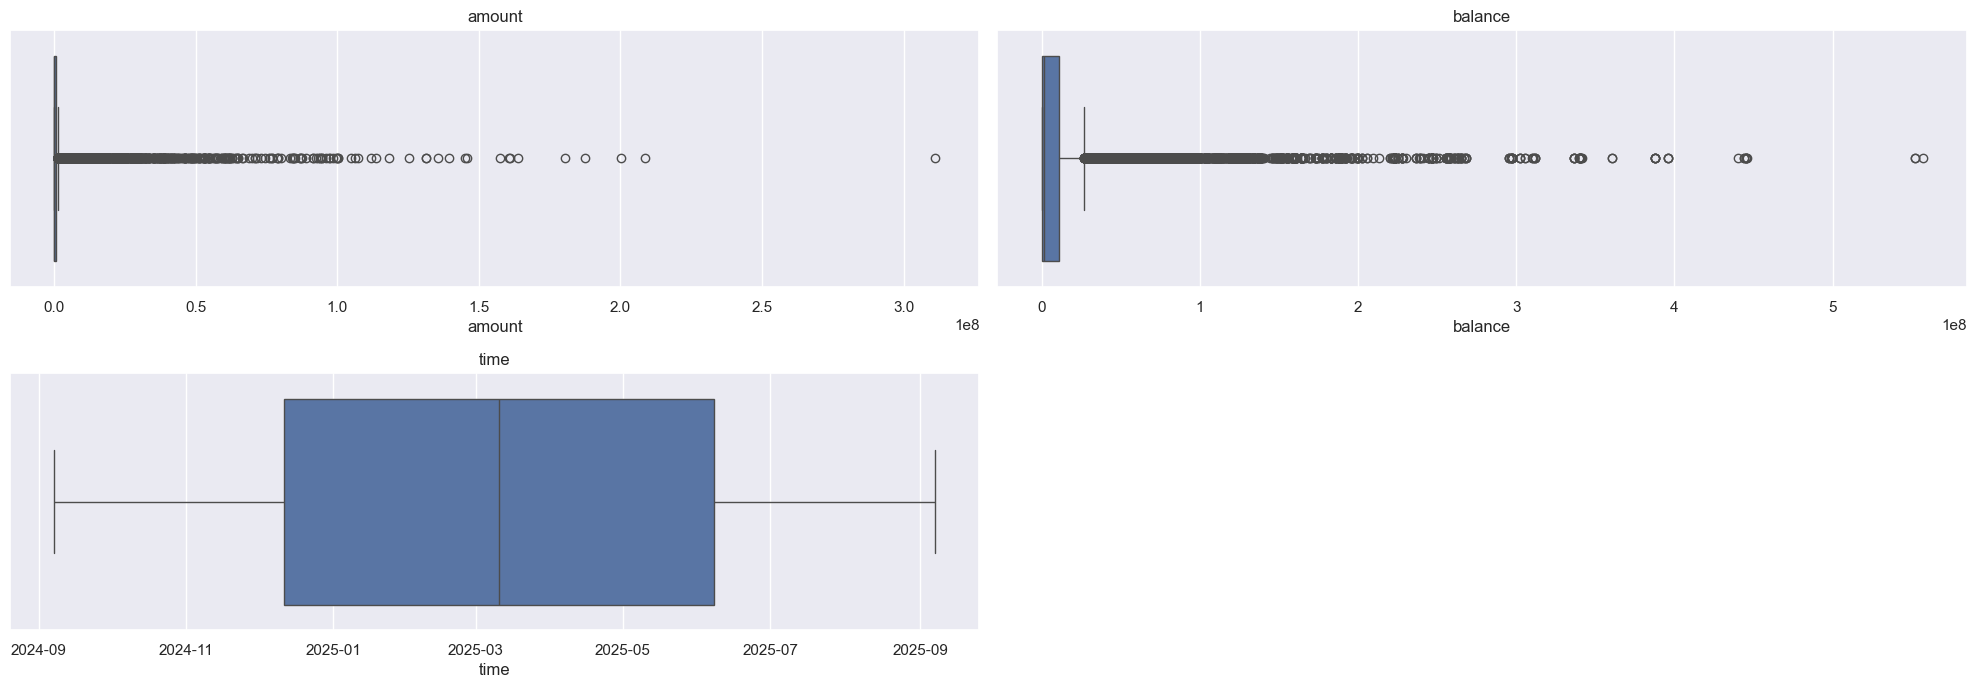

In [211]:
# Using the boxplot to visual the spread of the numeric data
columns = df_regular.describe().columns
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.ceil(len(columns))), 2, x[0] + 1)

        # Set the title of the Plot
        and plt.title(x[1])

        # Visualize the spread of the features
        and sns.boxplot(data=df_regular, x=x[1])

        # Set the label of the x-axis
        and plt.xlabel(x[1]),
    columns=columns,
    figsize=(20, 10)
)

Thanks to the visualization, we can now understand the data more.

- Can you sense the relationship between `balance` and `amount` too? They both have a lot of outliers and have similar spread.

We need to reduce these outliers so our model will be able to understand the data alot better.

The method we will be using for the reduction is IQR, so this way we can remove the noice and keep most of the relatively normal data.

I wonder how much data we will have to let go of.
Let's create a special function for this.

We will focus on the duo with most outliers, `amount` and `balance`.

In [212]:
df_outliers_reduced = analyst.remove_outliers(df_regular, ['amount', 'balance'], 2)

In [213]:
print(f'Length before outlier reduction: {len(df_regular)}')
print(f'Length after outlier reduction: {len(df_outliers_reduced)}')
print(f'Outliers removed: {len(df_regular) - len(df_outliers_reduced)}')

Length before outlier reduction: 24432
Length after outlier reduction: 18125
Outliers removed: 6307


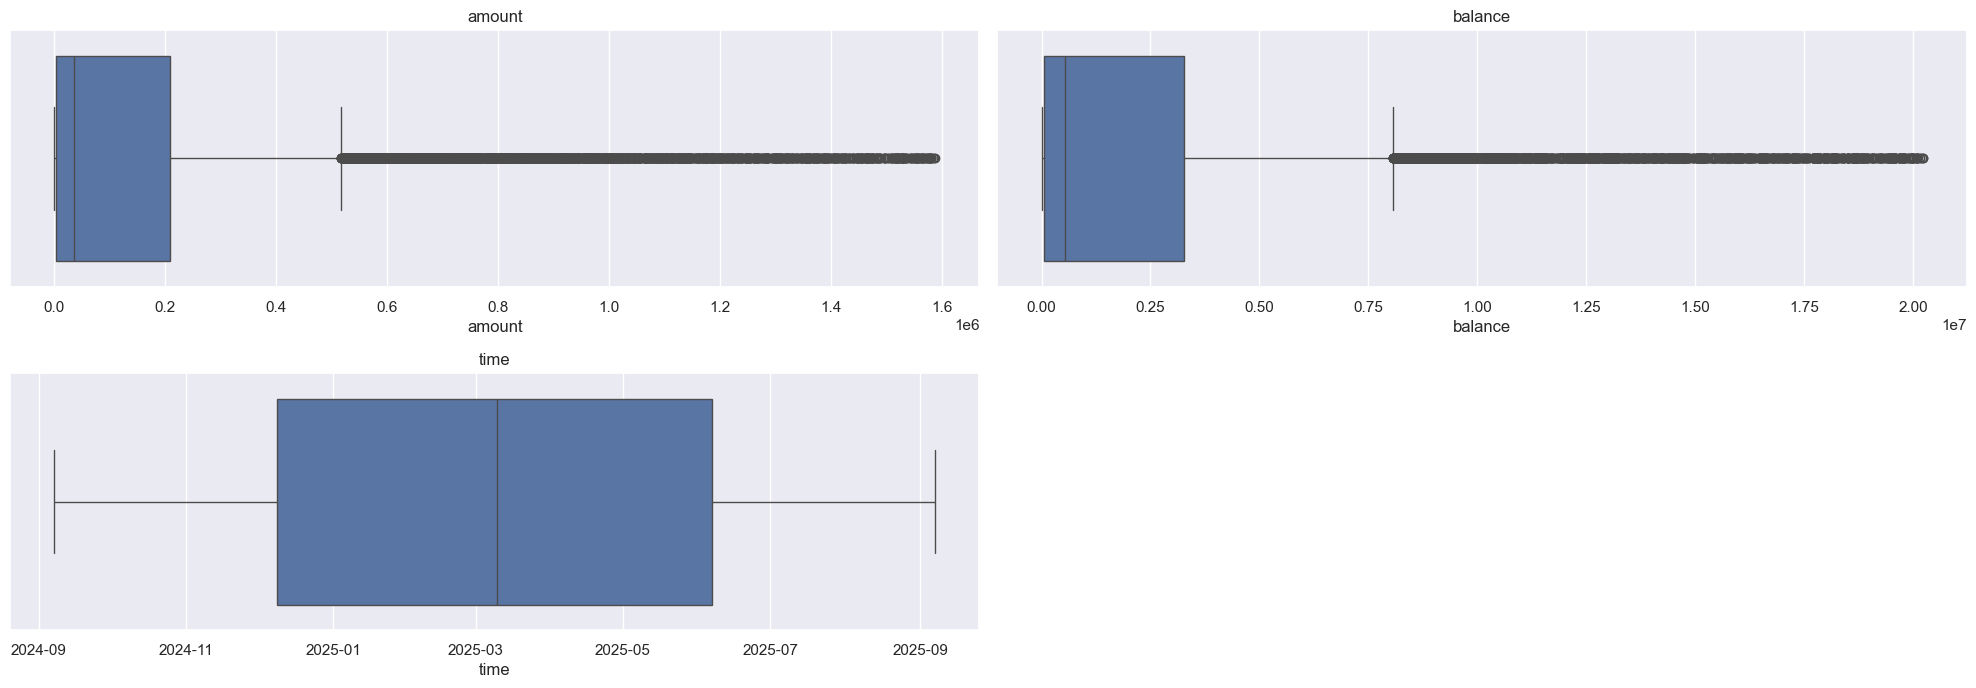

In [214]:
# Let's visualize the data again now the outliers has been removed
columns = df_outliers_reduced.describe().columns
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.ceil(len(columns))), 2, x[0] + 1)

        # Set the title of the Plot
        and plt.title(x[1])

        # Visualize the spread of the features
        and sns.boxplot(data=df_outliers_reduced, x=x[1])

        # Set the label of the x-axis
        and plt.xlabel(x[1]),
    columns=columns,
    figsize=(20, 10)
)

No that is better, our outliers has been reduced in balance and amount. We will be ignoring the rest of the outliers for now.

## Exploratory Analysis

Lets get to understand our data.

- Summary Statistics
- Correlation of Features
- Distribution of Data
- Spread of Data
- Trend Analysis 


In [215]:
# Before we begin, let's name our df properly
df_eda = df_outliers_reduced.copy()

#### Extracting Periodic features

Let's feed another curiousity we have been holding. When did most transactions occur at?

To do this we will have to extract the hour, day and month feature ealier than expected.

In [216]:
# Extracting the hour
df_eda['hour'] = df_eda['time'].dt.hour.astype(str).str.zfill(2)

# Extracting the day
df_eda['week_day'] = df_eda['time'].dt.day_name()

# Extracting the month
df_eda['month'] = df_eda['time'].dt.month_name()

# Extracting the date
df_eda['date'] = df_eda['time'].dt.date

# Extracting the month day
df_eda['month_day'] = df_eda['time'].dt.day.astype('object')

### Summary Statistics

In [217]:
# Let's take another look at the summary statistics
df_eda.describe()

amount     balance                           time
count   18125.00    18125.00                          18125
mean   183691.84  2535614.28  2025-03-08 21:22:57.111665920
min         0.19       21.26     2024-09-07 09:48:49.133128
25%      4231.93    65504.63  2024-12-08 19:05:16.133127936
50%     35072.39   534771.00  2025-03-09 20:30:11.133127936
75%    209024.26  3264394.19  2025-06-06 21:28:20.133127936
max   1587478.34 20216920.00     2025-09-07 09:19:25.133128
std    313178.19  4091690.23                            NaN

In [218]:
# Let's take a look at the statistics of the categorical features.
df_eda.describe(include=['object', 'bool'])

holder         holder_bvn holder_bank     related related_bvn  \
count            18125              18125       18125       18125       18125   
unique             793                763           1        7341        5249   
top     ACC_0000000470  USER_000000000470  BANK_00003  BANK_00003  BANK_00003   
freq               119                119       18125        2531        2531   

       related_bank  state  latitude longitude   status  ... merchant  \
count         18125  18125     18125     18125    18125  ...    18125   
unique           50     37       185       185        2  ...        2   
top      BANK_00003  Gombe  9.330506  5.067703  SUCCESS  ...    False   
freq           2765    937       341       341    15128  ...    16369   

       holder_state holder_latitude holder_longitude      opening_device  \
count         18125           18125            18125               18125   
unique           37             184              184                 771   
top             Imo        10.56636         3.745202  MOBILE_00470_00001   
freq            829             353              353                 119   

         hour week_day    month        date month_day  
count   18125    18125    18125       18125     18125  
unique     24        7       12         366        31  
top        07   Friday  January  2024-10-09        24  
freq      809     2679     1600          77       656  

[4 rows x 27 columns]

Things that stand out in this summary.

- There are `793` different accounts that transacted within the time of this transactions.

- All these `793` accounts belong to only `763` users, some users own multiple accounts.

- There are `50` related banks, which corresponds to the total number of banks in the simulation.

- There are `6` categories of tranactions that fall under the `2` types of transactions (Debit/Credit)

- A total of `7087` devices where also used accross `3` channels were used.

- There were `17028` related transactions based on the unique `nonce` in the dataset.

- The transaction spans accross `37` unique states, suggesting it is all accross Nigeria.

- The most transactions took place in `Gombe`. (Ballers 💰). Is the there a hotspot there?

- The most frequent type and category of transactions are `DEBIT` and `WITHDRAWAL` respectively. Could there be more outflow than inflow?

- Most transactions were not reported, we will see the proportion later in this notebook.

- `January` is the most frequent month, though the day with most transactions is in `October` on `2025-04-06`

- `Month` day of `24` has the most frequent transactions.

- There is only 1 holder bank, `Mara Bank` so we will drop the column

- Most users are of `KYC` leve of `3`.

- `Friday` is the most active day of the week.

In [219]:
df_eda.drop(columns='holder_bank', inplace=True)

### Correlations

Before we continue on our exploration, let's ask a vital question early.

- Do our `data` points have any form of `relationship` with each other.

- If they do, what could be the `reason` for that relationship to exist?

##### Correlation of all features

Let's see how all our features are correlating with one another.

To do this we need to encode the categorical/discrete features.

In [220]:
df_eda.dtypes

amount                     float64
balance                    float64
time                datetime64[ns]
holder                      object
holder_bvn                  object
related                     object
related_bvn                 object
related_bank                object
state                       object
latitude                    object
longitude                   object
status                      object
type                        object
category                    object
channel                     object
device                      object
nonce                       object
reported                      bool
kyc                         object
merchant                      bool
holder_state                object
holder_latitude             object
holder_longitude            object
opening_device              object
hour                        object
week_day                    object
month                       object
date                        object
month_day           

Latitude and Longitude are numberical, however they are actually discrete variables, hence we will encode them before correlating.

Also, time is a date variable which is an ordinal and will be treated as a continious variable.

Hence our continious variables include `time`, `amount`, `balance`

##### Let's encode the discrete features so we can correlate them with other features.

We will be using a special function for this.

In [221]:
# Get the discrete features
discrete_features = df_eda.select_dtypes(include=['object', 'bool']).columns.tolist()
discrete_features

['holder',
 'holder_bvn',
 'related',
 'related_bvn',
 'related_bank',
 'state',
 'latitude',
 'longitude',
 'status',
 'type',
 'category',
 'channel',
 'device',
 'nonce',
 'reported',
 'kyc',
 'merchant',
 'holder_state',
 'holder_latitude',
 'holder_longitude',
 'opening_device',
 'hour',
 'week_day',
 'month',
 'date',
 'month_day']

In [222]:
# Encode the discrete features
df_corr = engineer.encoder(df_eda, discrete_features)

# Concatinate the encoded discrete features with the non discrete features
df_corr = pd.concat([df_eda[['amount', 'balance', 'time']], df_corr], axis=1)
df_corr

amount    balance                       time  holder  holder_bvn  \
70675 607502.65  607502.65 2024-09-07 09:48:49.133128       1          16   
70676 827612.62  827612.62 2024-09-07 09:49:47.133128       2          18   
70678 318279.43  318279.43 2024-09-07 09:56:25.133128       4          41   
70679  92735.45   92735.45 2024-09-07 09:58:03.133128       5          46   
70680 109180.63  109180.63 2024-09-07 10:00:02.133128       6          54   
...         ...        ...                        ...     ...         ...   
95097 160573.37 1200329.63 2025-09-07 07:11:46.133128     750         746   
95098   1586.77   18558.00 2025-09-07 07:14:07.133128     320         213   
95099   3223.84  112389.73 2025-09-07 07:14:08.133128     322         237   
95101   6571.05   59575.95 2025-09-07 08:44:47.133128     728         293   
95105   1226.16   40798.00 2025-09-07 09:19:25.133128     585         660   

       related  related_bvn  related_bank  state  latitude  ...  merchant  \
70675     7340           96             3     16        26  ...         0   
70676     7340           96             3      6        42  ...         0   
70678     7340           96             3      1        78  ...         1   
70679     7340           96             3      8       174  ...         0   
70680     7340           96             3     19        49  ...         0   
...        ...          ...           ...    ...       ...  ...       ...   
95097     6982          362            29     14       169  ...         0   
95098     7340           96             3     30       144  ...         0   
95099     6066         4612            18     28       162  ...         0   
95101     7306           62            31     12       119  ...         0   
95105     7246            2             0      3        31  ...         0   

       holder_state  holder_latitude  holder_longitude  opening_device  hour  \
70675            16               26                50              16     9   
70676             6               42                83              18     9   
70678             1               78                92              41     9   
70679             8              173               115              46     9   
70680            19               49               174              54    10   
...             ...              ...               ...             ...   ...   
95097            14              168                61             754     7   
95098            30              145                22             217     7   
95099            28              154               135             241     7   
95101            12              118                38             298     8   
95105            31              123                66             668     9   

       week_day  month  date  month_day  
70675         2     11     0          6  
70676         2     11     0          6  
70678         2     11     0          6  
70679         2     11     0          6  
70680         2     11     0          6  
...         ...    ...   ...        ...  
95097         3     11   365          6  
95098         3     11   365          6  
95099         3     11   365          6  
95101         3     11   365          6  
95105         3     11   365          6  

[18125 rows x 29 columns]

In [223]:
# Correlate the features with each other
corr_matrix = df_corr.corr(method='pearson')
corr_matrix

amount  balance  time  holder  holder_bvn  related  \
amount              1.00     0.37  0.01   -0.00       -0.00     0.01   
balance             0.37     1.00  0.02   -0.05       -0.05    -0.12   
time                0.01     0.02  1.00    0.66        0.47     0.31   
holder             -0.00    -0.05  0.66    1.00        0.69     0.23   
holder_bvn         -0.00    -0.05  0.47    0.69        1.00     0.15   
related             0.01    -0.12  0.31    0.23        0.15     1.00   
related_bvn        -0.02     0.10  0.28    0.17        0.13    -0.14   
related_bank       -0.03     0.05  0.00   -0.03       -0.00    -0.22   
state               0.02     0.01  0.01    0.01       -0.02     0.00   
latitude           -0.01    -0.01  0.01    0.02        0.02    -0.00   
longitude           0.00     0.01  0.01    0.01       -0.01     0.00   
status              0.01     0.08 -0.01    0.00       -0.01     0.08   
type               -0.02    -0.19  0.01   -0.02       -0.01    -0.21   
category           -0.00    -0.17  0.02    0.00        0.00    -0.02   
channel            -0.02    -0.01 -0.00   -0.03       -0.02     0.04   
device              0.02     0.02  0.31    0.23        0.21    -0.02   
nonce               0.00    -0.00 -0.00   -0.01       -0.00    -0.02   
reported            0.00     0.04 -0.01   -0.01        0.01    -0.01   
kyc                 0.36     0.64 -0.01   -0.03       -0.04    -0.15   
merchant           -0.00    -0.01  0.03    0.04        0.03     0.02   
holder_state        0.01     0.09 -0.01   -0.02       -0.06    -0.03   
holder_latitude    -0.02     0.03  0.02    0.03        0.04    -0.01   
holder_longitude    0.01     0.00 -0.00   -0.01       -0.02    -0.00   
opening_device     -0.00    -0.05  0.47    0.69        1.00     0.15   
hour               -0.01    -0.02  0.00   -0.00       -0.00     0.00   
week_day           -0.00    -0.01 -0.01   -0.01        0.00    -0.00   
month               0.00    -0.02 -0.44   -0.29       -0.24    -0.16   
date                0.01     0.02  1.00    0.66        0.47     0.31   
month_day           0.00     0.00  0.02    0.01        0.02     0.00   

                  related_bvn  related_bank  state  latitude  ...  merchant  \
amount                  -0.02         -0.03   0.02     -0.01  ...     -0.00   
balance                  0.10          0.05   0.01     -0.01  ...     -0.01   
time                     0.28          0.00   0.01      0.01  ...      0.03   
holder                   0.17         -0.03   0.01      0.02  ...      0.04   
holder_bvn               0.13         -0.00  -0.02      0.02  ...      0.03   
related                 -0.14         -0.22   0.00     -0.00  ...      0.02   
related_bvn              1.00          0.17  -0.01      0.01  ...      0.01   
related_bank             0.17          1.00   0.01      0.05  ...      0.00   
state                   -0.01          0.01   1.00     -0.02  ...     -0.02   
latitude                 0.01          0.05  -0.02      1.00  ...     -0.01   
longitude                0.01         -0.02   0.00     -0.10  ...      0.00   
status                  -0.07         -0.09   0.00      0.00  ...     -0.00   
type                     0.17          0.23   0.00     -0.00  ...      0.00   
category                 0.03          0.12   0.01      0.00  ...      0.00   
channel                 -0.05          0.09  -0.02     -0.01  ...      0.01   
device                   0.23         -0.13   0.01      0.01  ...      0.02   
nonce                    0.00          0.02   0.00     -0.00  ...     -0.01   
reported                 0.00          0.00   0.00      0.01  ...     -0.00   
kyc                      0.11          0.05   0.01     -0.01  ...     -0.02   
merchant                 0.01          0.00  -0.02     -0.01  ...      1.00   
holder_state            -0.01          0.02   0.57      0.01  ...     -0.02   
holder_latitude          0.02          0.04   0.01      0.62  ...      0.01   
holder_longitude        -0.00         -0

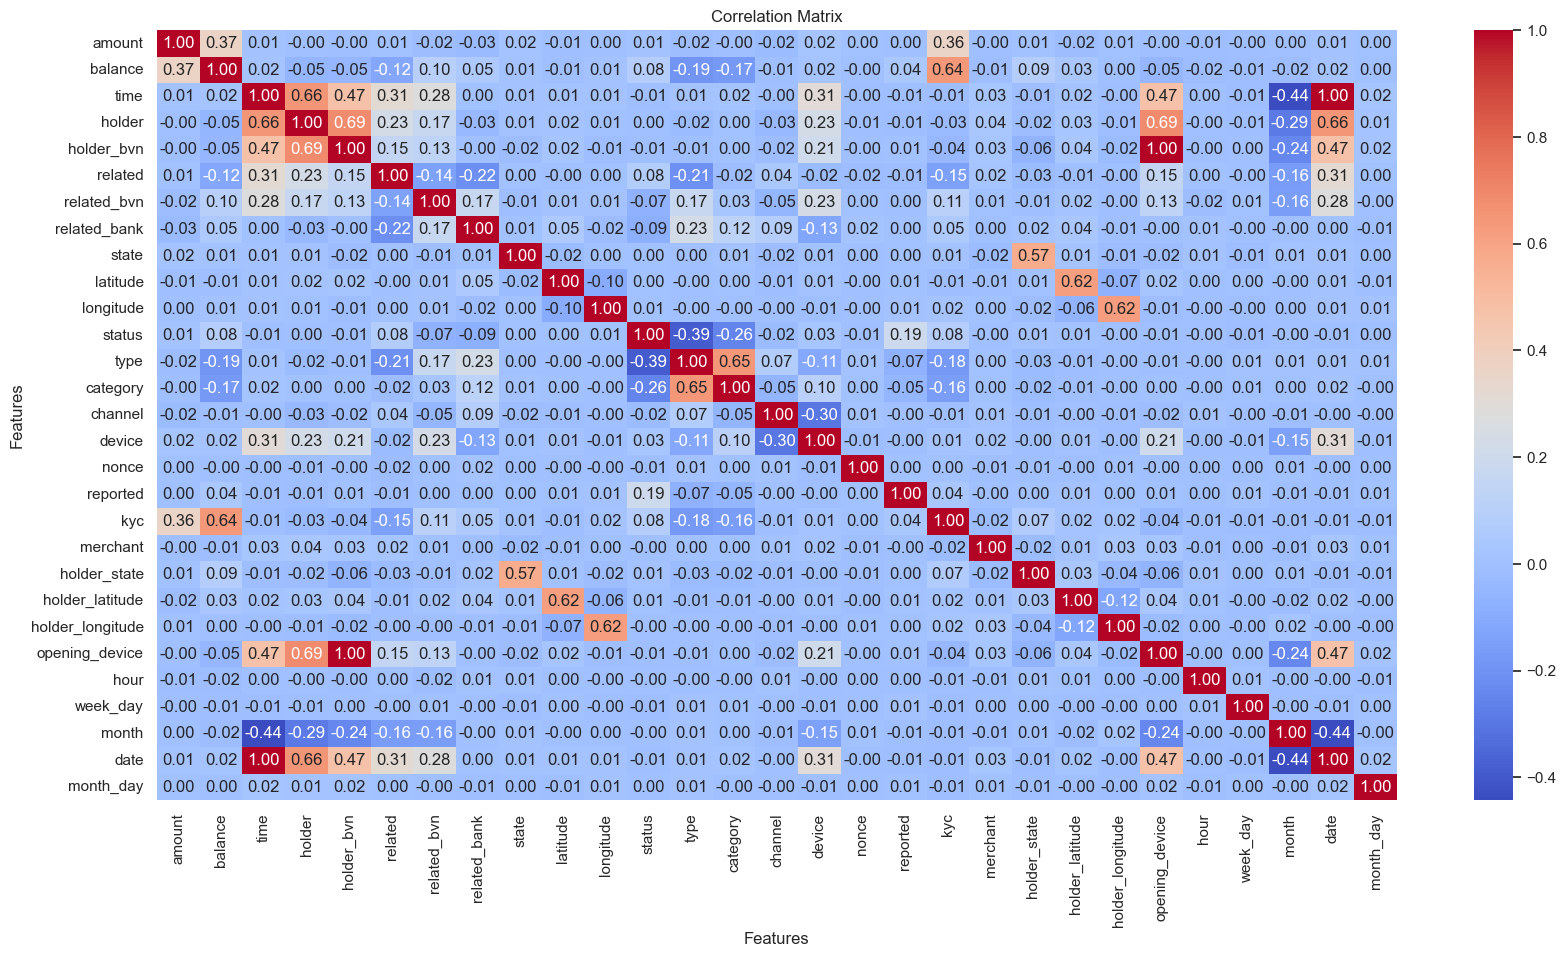

In [224]:
# Plot confusion matrix 
plt.figure(figsize=(20, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Observations:

- Strong positive correlation between amount and balance suggests transaction values drive balances.

- time and date correlates well with the user features like holder, related, related_bvn, and holder_bvn hinting at potential redundancy or leakage.

- Negative correlation between month and time suggests seasonality impacts transaction timing.

- type and category show a strong positive correlation, implying categories belong to different types.

- Device usage (device) correlates moderately with time, useful for time-device fraud detection.

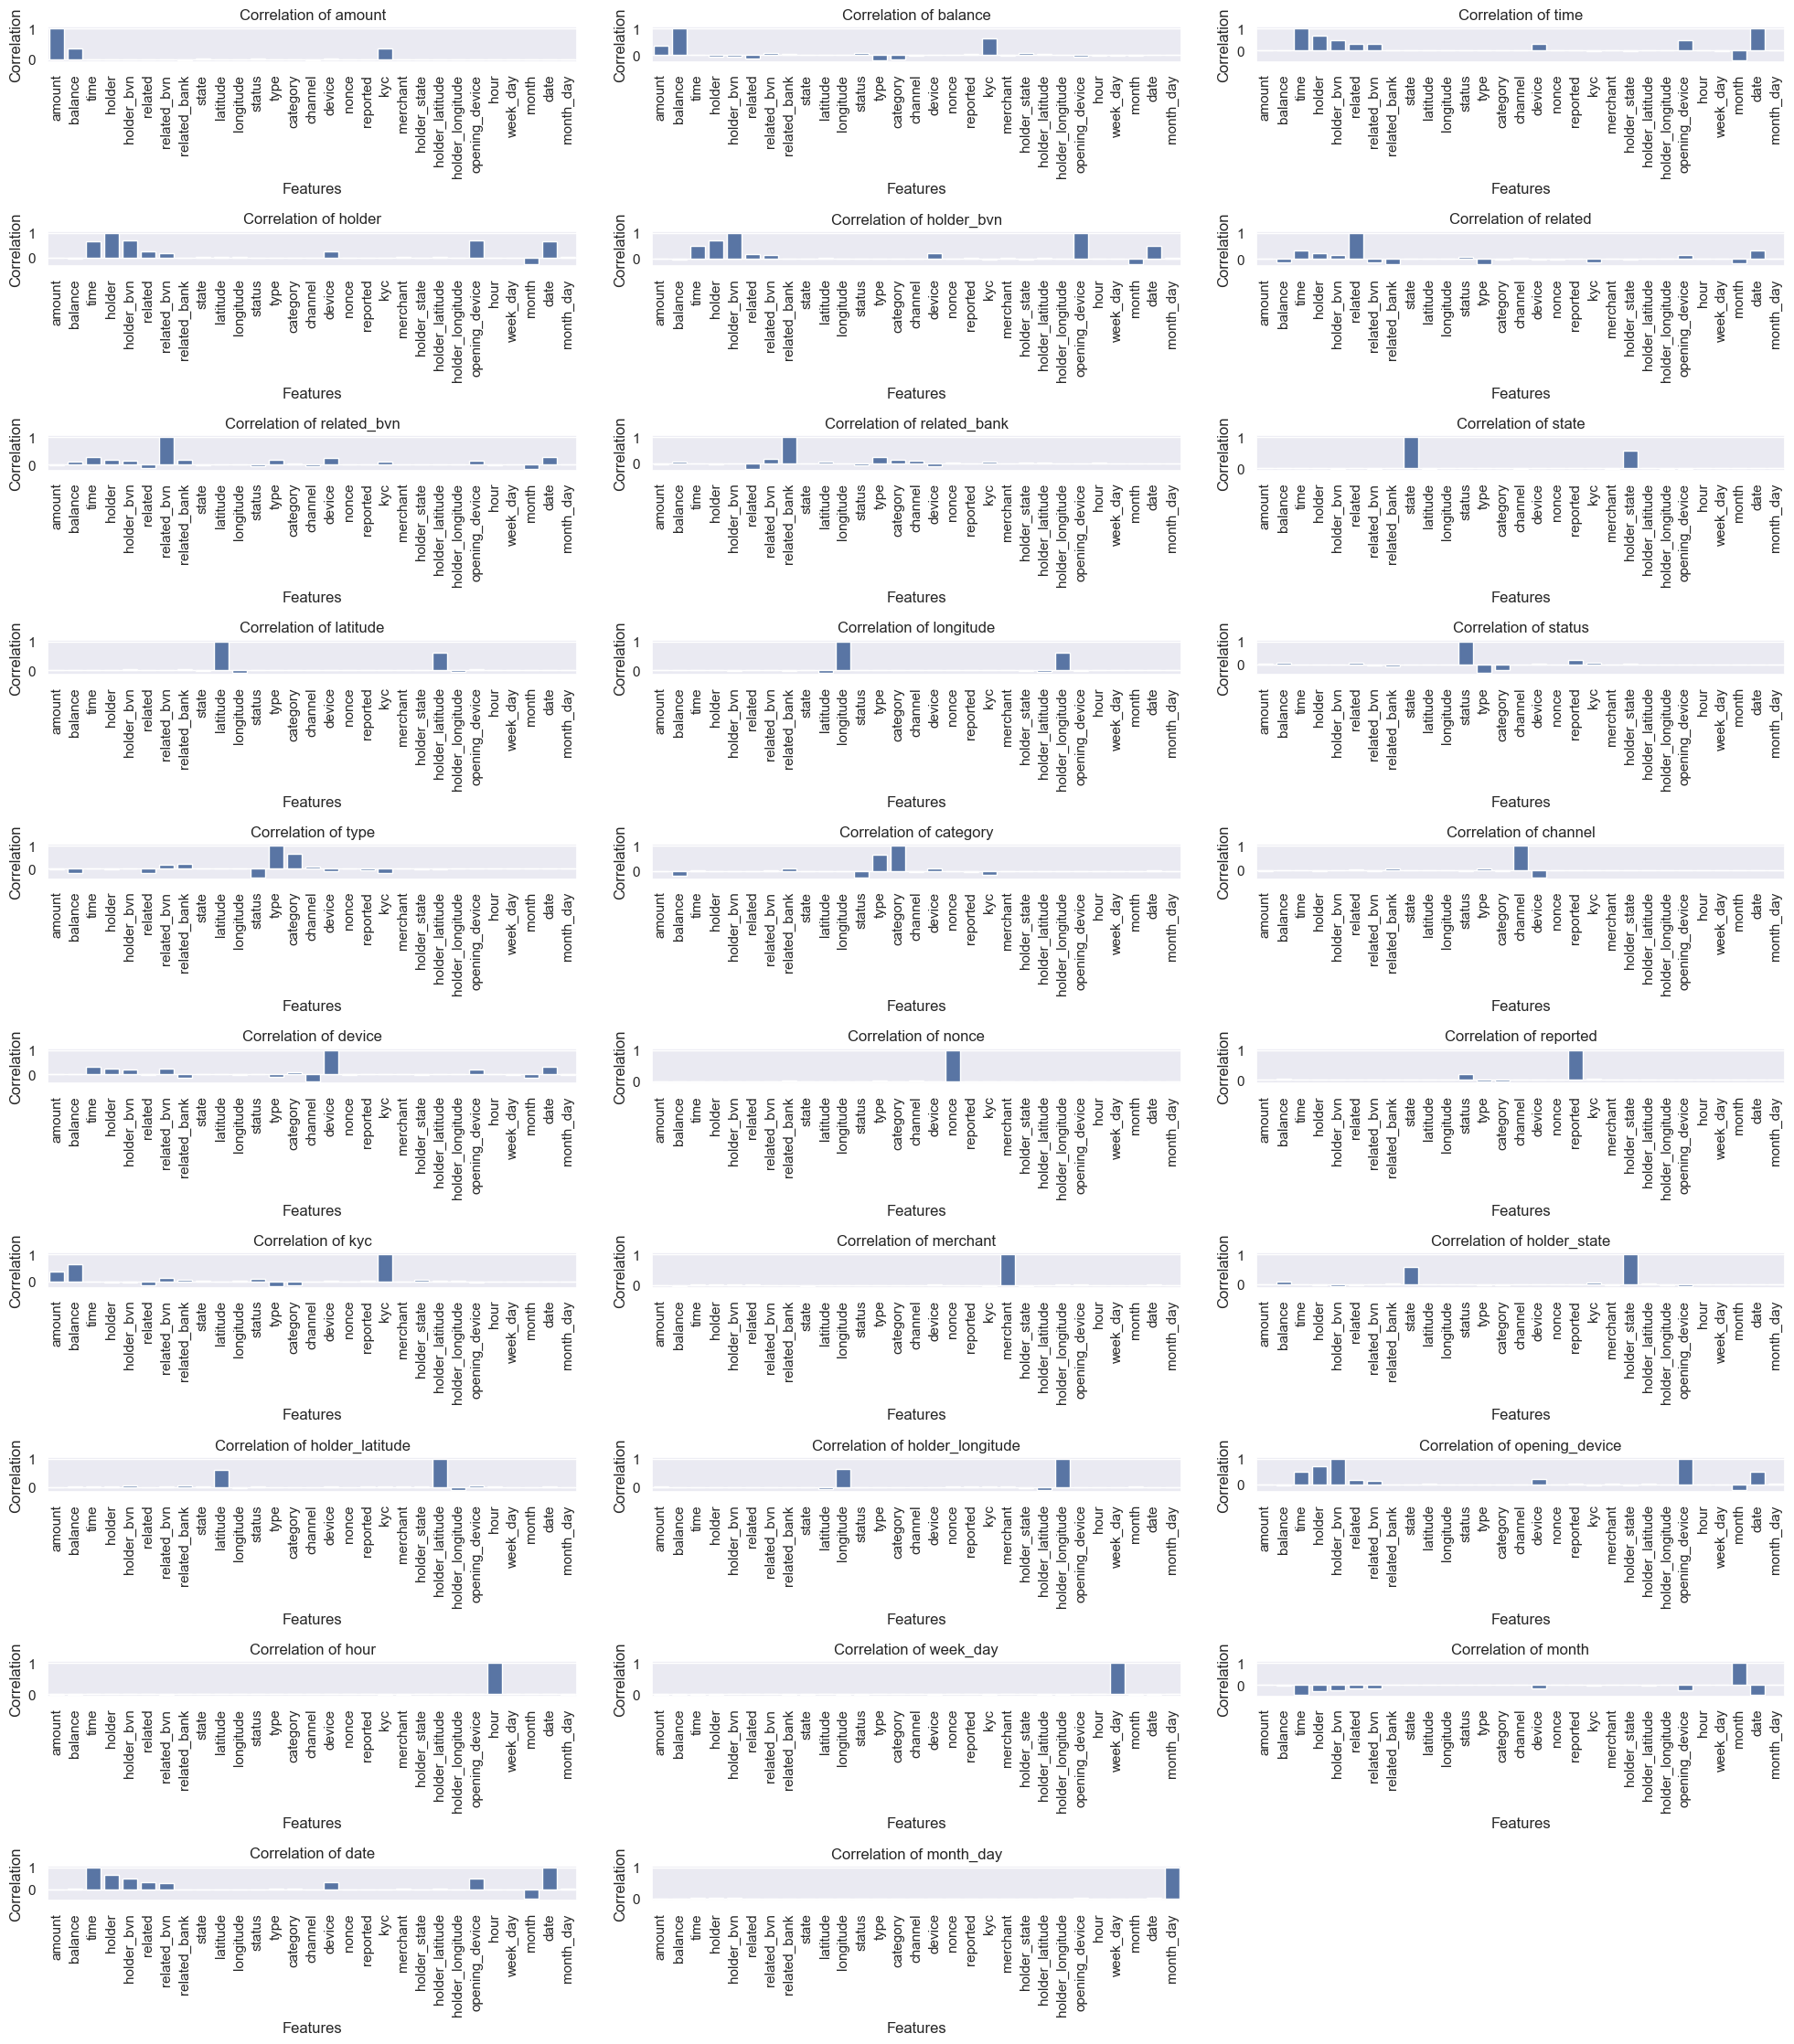

In [ ]:
# Plot the correlation matrix
analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.floor(len(corr_matrix.columns)/2)), 3, x[0] + 1)

        # Visualize the correlation of the features
        and sns.barplot(data=corr_matrix, x=corr_matrix.index, y=x[1])

        # Set the plot title
        and plt.title(f'Correlation of {x[1]}')

        # Set x lable
        and plt.xlabel('Features')

        # Set y lable
        and plt.ylabel('Correlation')
        
        and plt.tick_params(axis='x', rotation=90),

    # Set the figsize
    figsize=(20, 30),
    columns=corr_matrix.columns,
)

Visualizing the correlations, things are getting a lot more clearer.

We will now prioritize highly correlated features.

In [226]:
interesting_correlation = analyst.bounded_correlation(corr_matrix)

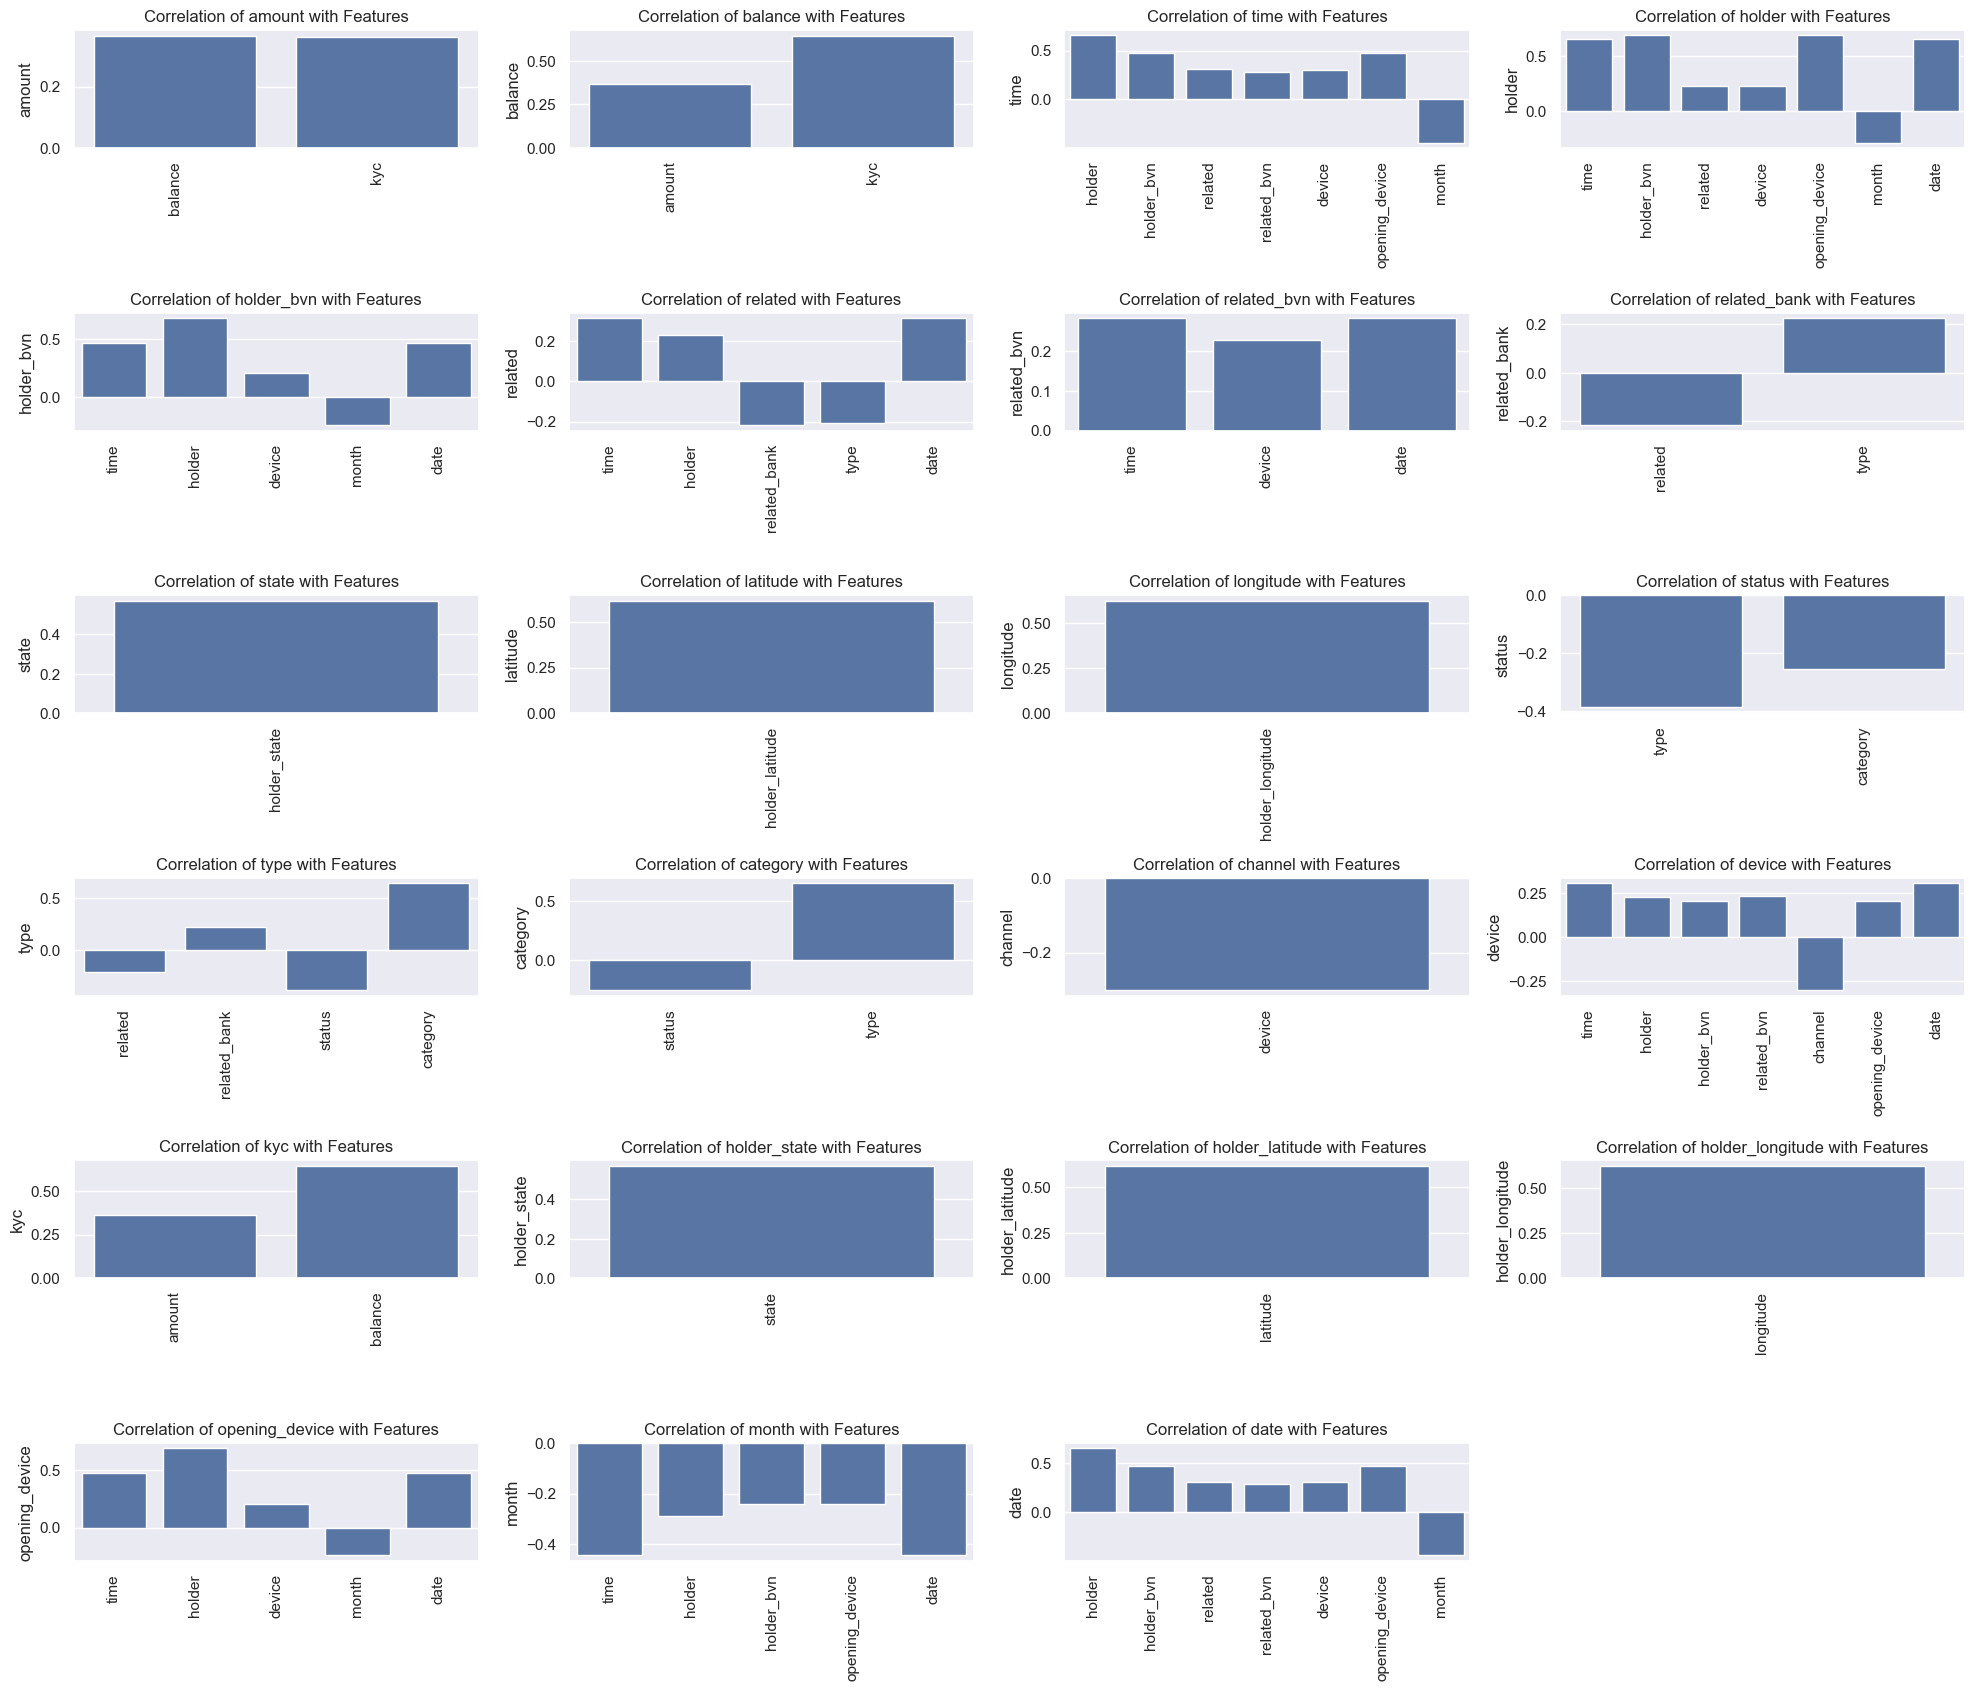

In [253]:
plt.figure(figsize=(20, 30))
analyst.plot_bounded_correlation(interesting_correlation)

Nice, now we have the correlations that we are interested in, what do we see?

- `Amount` and `Balance`: Show very strong mutual positive correlation.

- `Holder` & `Holder BVN`: Both highly correlate positively with `time` and `date`.

- `Related` & `Related BVN`: Exhibit a very strong positive correlation with each other.

- `Status` & `Type`: Are notably correlated, especially with `category`.

- `Device` & `Month`: Consistently show minimal to weak correlations overall.

Let's get the distribution of features with there correlation with other features

In [228]:
# Get the correlations within out threshold
valued_correlations = analyst.bounded_correlation(corr_matrix)

# Count and sum the correlations of each feature
valued_correlations_count = {x: {'count': len(valued_correlations[x]), 'sum': sum(abs(valued_correlations[x]))} for x in valued_correlations}

# Convert it to a dataframe
valued_corr_df = pd.DataFrame(valued_correlations_count).transpose().sort_values(by='count', ascending=False).reset_index(names='feature')

valued_corr_df

feature  count  sum
0               date   7.00 2.94
1               time   7.00 2.94
2             holder   7.00 3.43
3             device   7.00 1.78
4         holder_bvn   5.00 2.08
5            related   5.00 1.28
6              month   5.00 1.66
7     opening_device   5.00 2.08
8               type   4.00 1.47
9        related_bvn   3.00 0.80
10               kyc   2.00 1.01
11          category   2.00 0.90
12            amount   2.00 0.73
13           balance   2.00 1.01
14      related_bank   2.00 0.44
15            status   2.00 0.64
16           channel   1.00 0.30
17         longitude   1.00 0.62
18          latitude   1.00 0.62
19      holder_state   1.00 0.57
20   holder_latitude   1.00 0.62
21  holder_longitude   1.00 0.62
22             state   1.00 0.57

<Axes: title={'center': 'Correlation Strength'}, xlabel='count', ylabel='sum'>

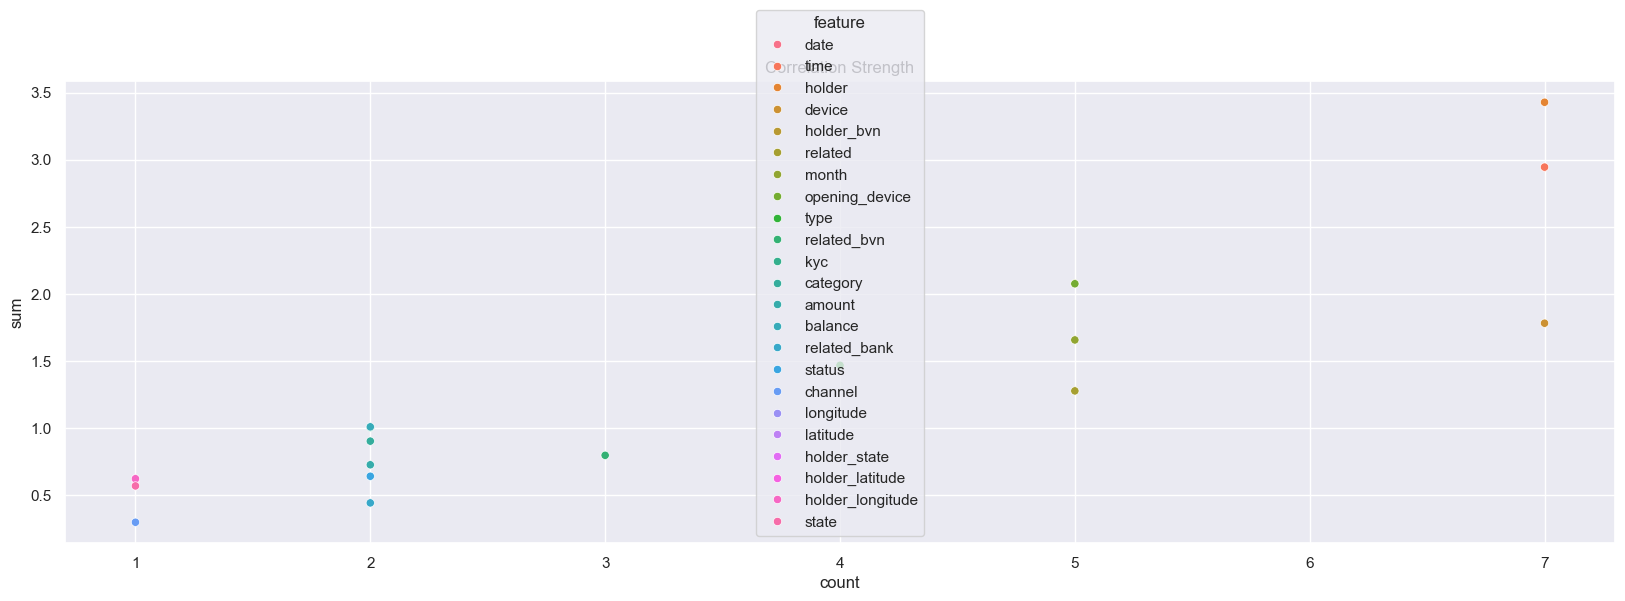

In [229]:
# Visualize the the correlations
plt.figure(figsize=(20, 6))
plt.title('Correlation Strength')
sns.scatterplot(data=valued_corr_df, x='count', y='sum', hue='feature')

Things that stand out from this plot:

- Strongest Correlations: Features `holder`, `time`, `holder_bvn`, `month`, and `date` show the highest correlations with `holder` as the strongest.

- Weakest Correlations: `Amount` and `category` consistently exhibit very low correlation strength across all counts.

- Variable Correlation Strength: Most features display varying correlation strengths depending on the `count` value.

- Increasing Count, Increasing Strength: For the most correlated features, strength generally increases with higher `count`.

- Outliers in Correlation: `Related` and `related_bvn` show moderate correlation, unlike others at higher counts.

### Distribution of Data

Let's visualize the distibution of the continious and discrete features

#### General View

Let's look at our data from the outside to the inside, this will enable use get a better understanding.

In [230]:
# Let's see the details of our dataset to choose the columns to visualize
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18125 entries, 70675 to 95105
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   amount            18125 non-null  float64       
 1   balance           18125 non-null  float64       
 2   time              18125 non-null  datetime64[ns]
 3   holder            18125 non-null  object        
 4   holder_bvn        18125 non-null  object        
 5   related           18125 non-null  object        
 6   related_bvn       18125 non-null  object        
 7   related_bank      18125 non-null  object        
 8   state             18125 non-null  object        
 9   latitude          18125 non-null  object        
 10  longitude         18125 non-null  object        
 11  status            18125 non-null  object        
 12  type              18125 non-null  object        
 13  category          18125 non-null  object        
 14  channel           18125

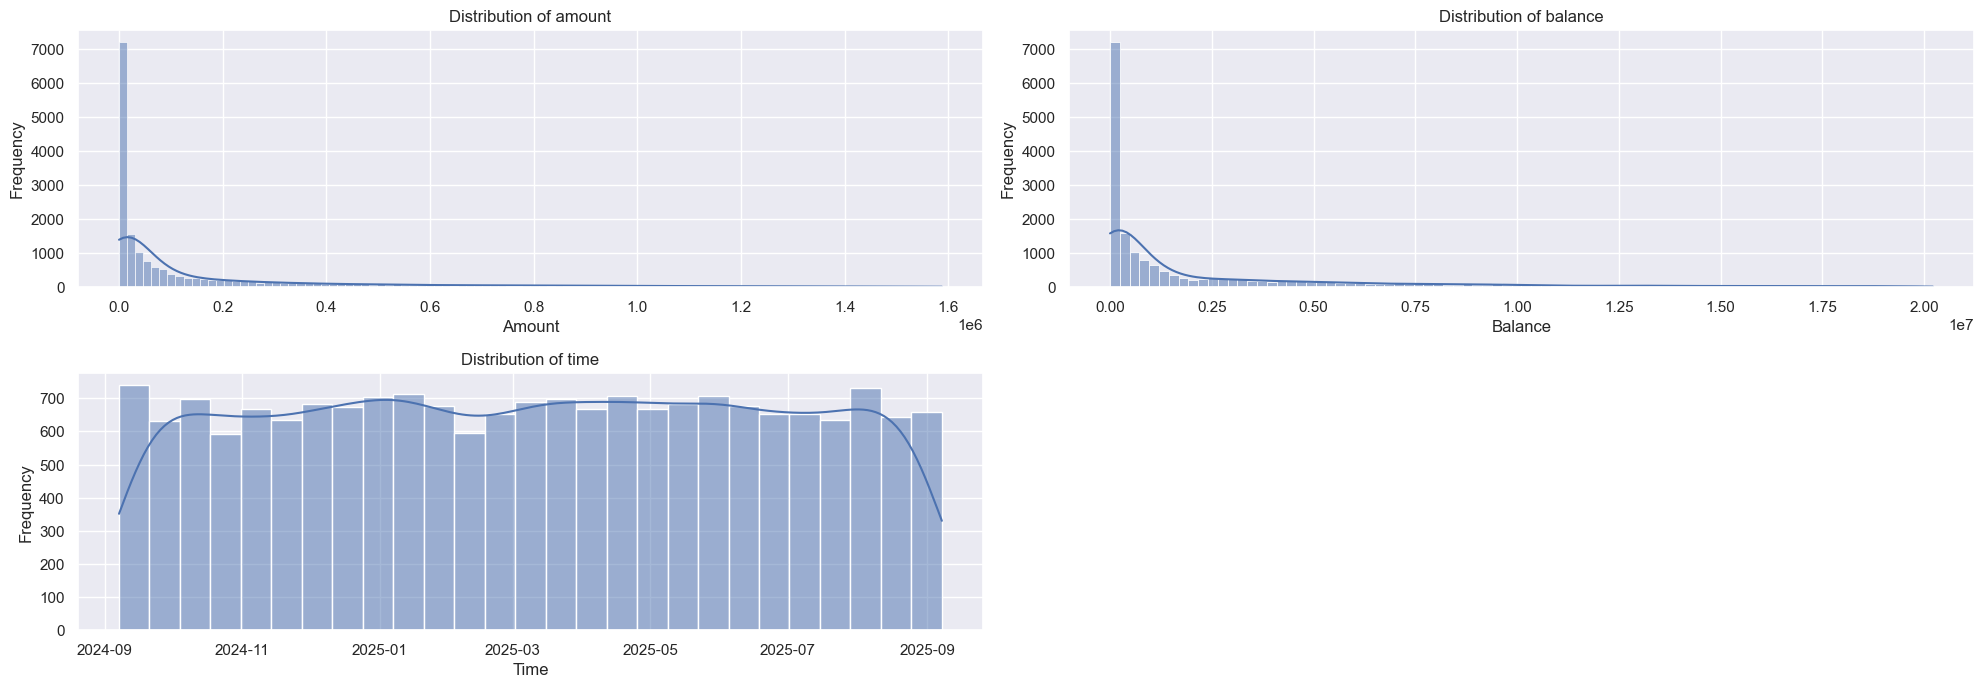

In [231]:
# Visualize the distribution of the continious features.
columns = ['amount', 'balance', 'time']

analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(len(columns), 2, x[0] + 1)

        # Visualize the distribution of the features
        and sns.histplot(data=df_eda, x=x[1], kde=True)

        # Set the plot title
        and plt.title(f'Distribution of {x[1]}')

        # Set X lable
        and plt.xlabel(x[1].capitalize())

        # Set Y lable
        and plt.ylabel('Frequency'),

    # Set the figsize
    figsize=(20, 10),
    columns=columns,
)

Things that stand out.

- `Amount`: Heavily right-skewed; most transactions are for small amounts.

- `Balance`: Right-skewed, similar to amount; many transactions have low balances.

- `Time`: Frequency is relatively uniform across months (2024-2025).

- Both `amount` & `balance` distributions show a sharp drop-off after small values.

- No strong trend or seasonality evident in the time distribution plot.





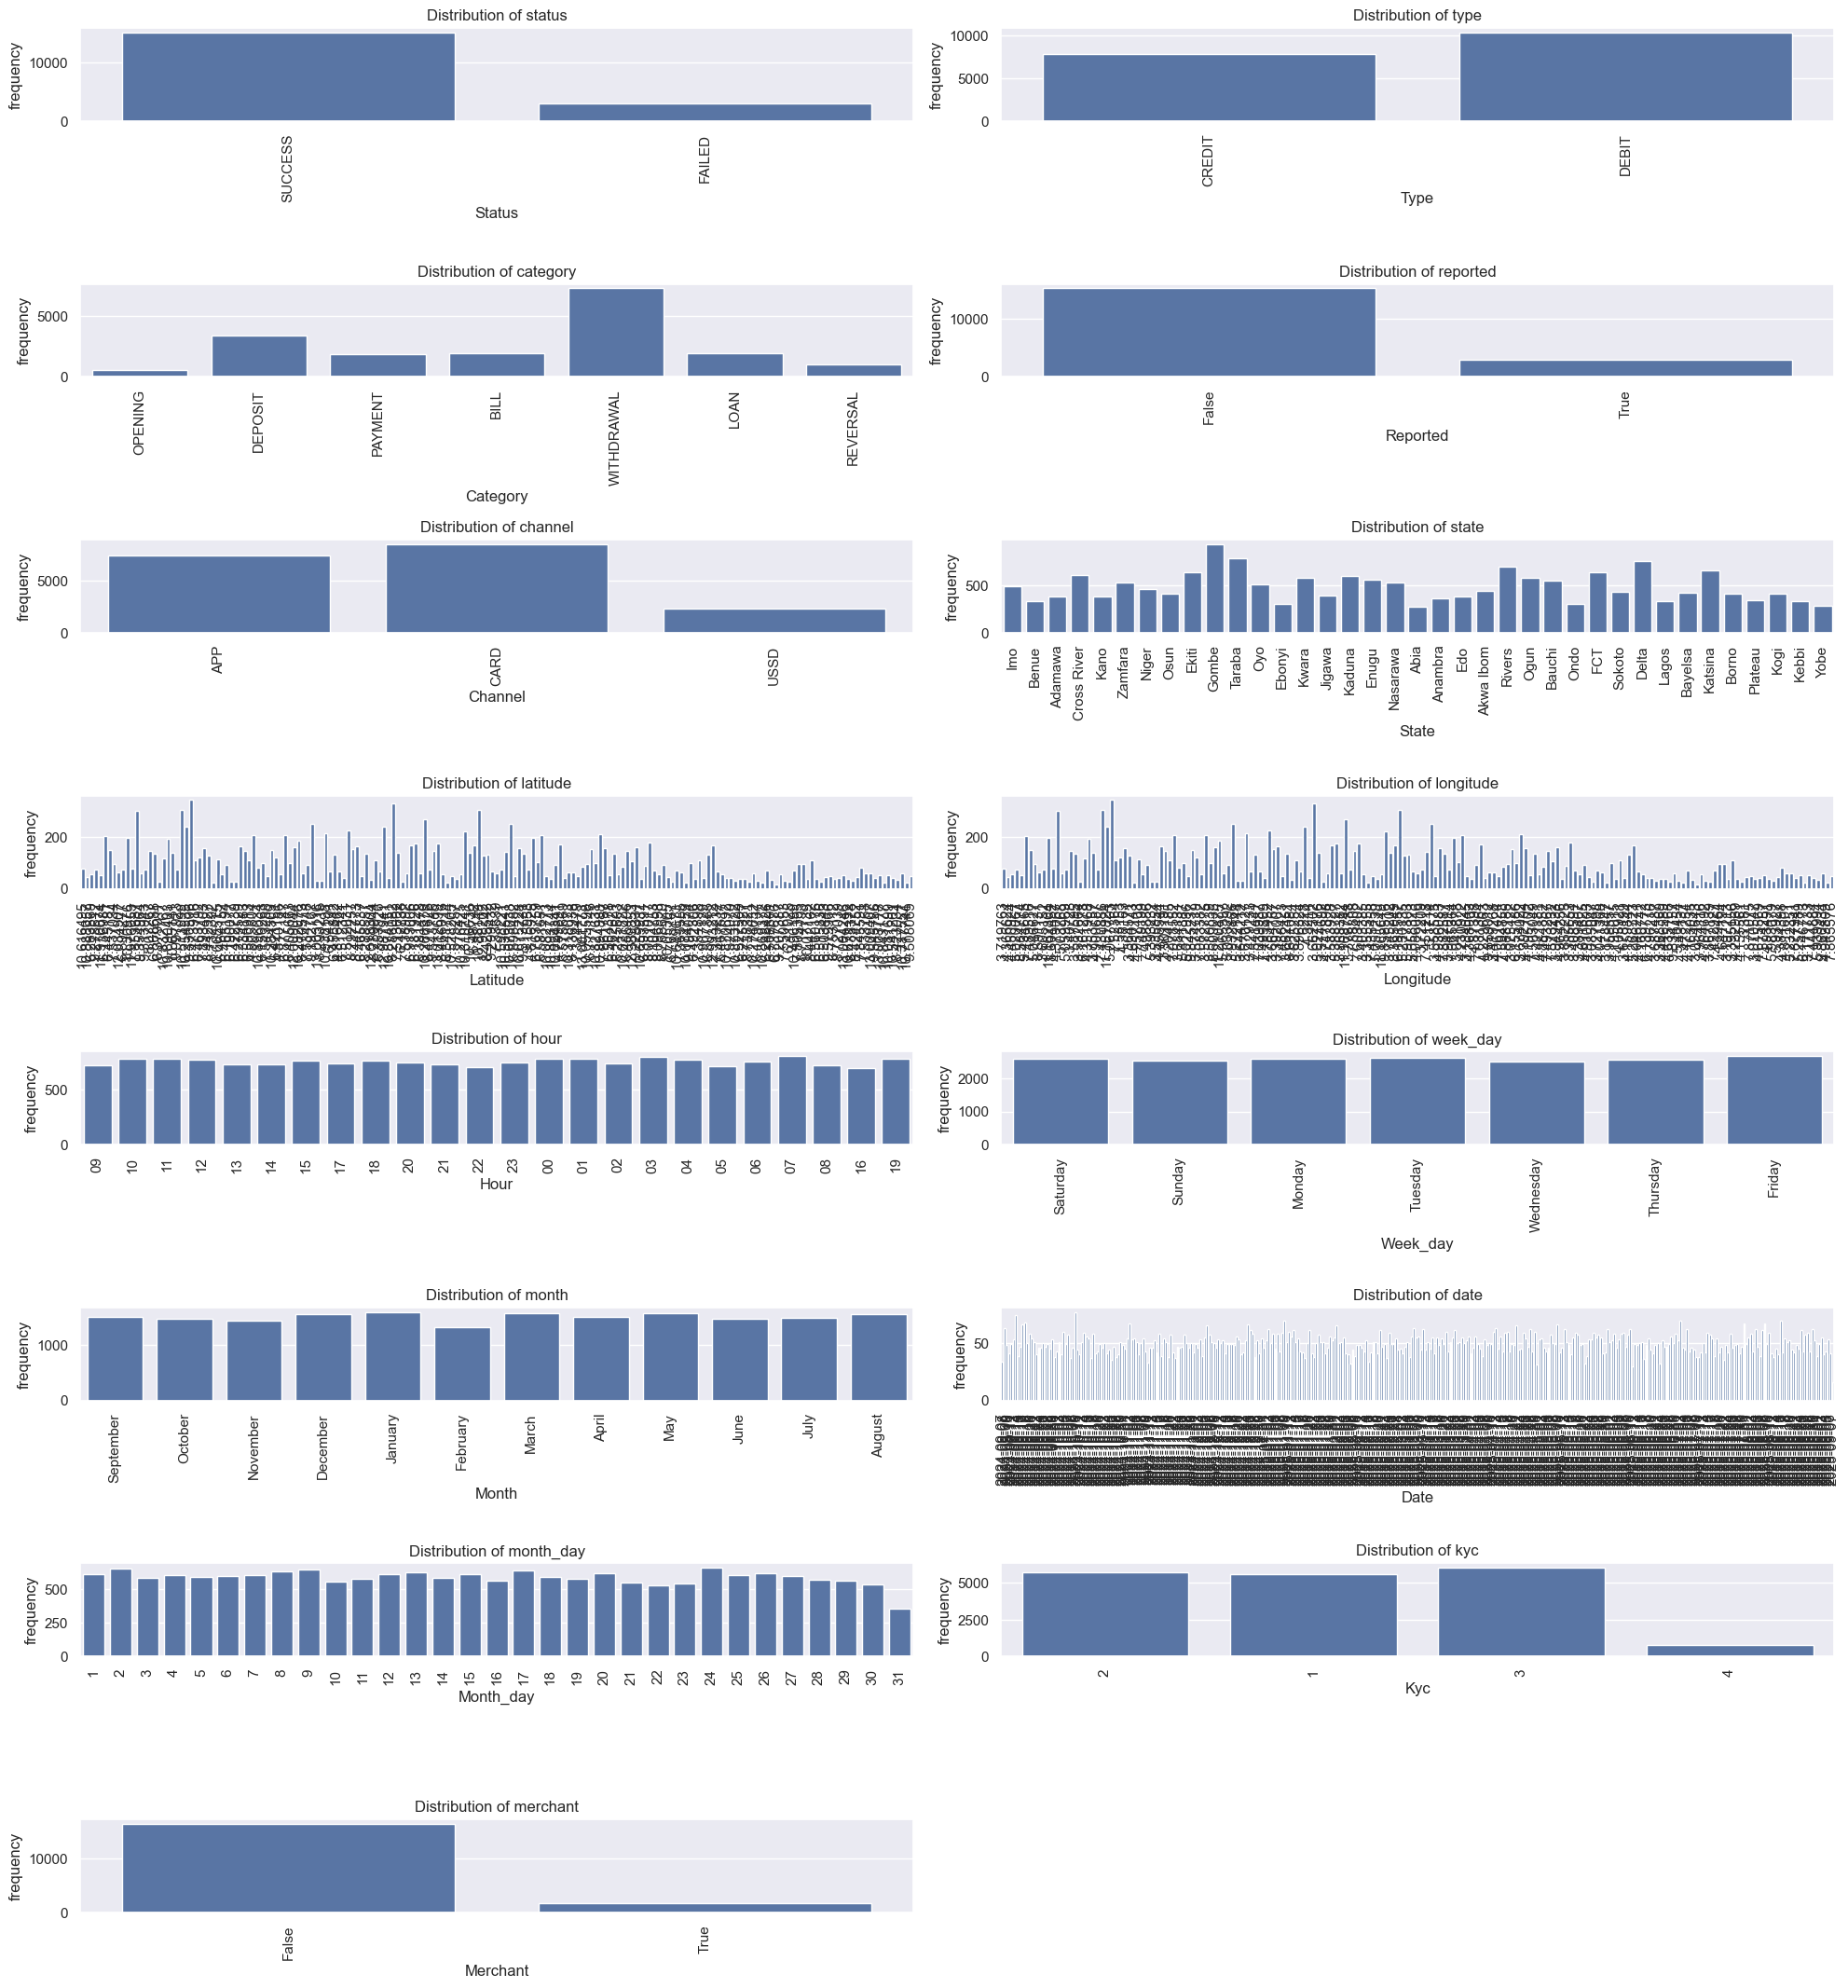

In [232]:
# Visualize the distribution of the discrete features.
columns = [
    'status',
    'type',
    'category',
    'reported',
    'channel',
    'state',
    'latitude',
    'longitude',
    'hour',
    'week_day',
    'month',
    'date',
    'month_day',
    'kyc',
    'merchant'
]

analyst.plotter(
    plot=lambda x:
        # Set subplots sections
        plt.subplot(int(np.floor(len(columns))), 2, x[0] + 1)

        # Visualize the distribution of the features
        and sns.countplot(data=df_eda, x=x[1])

        # Set the plot title
        and plt.title(f'Distribution of {x[1]}')

        # Set x lable
        and plt.xlabel(x[1].capitalize())

        # Set y lable
        and plt.ylabel('frequency')

        and plt.tick_params(axis='x', rotation=90),

    # Set the figsize
    figsize=(20, 40),
    columns=columns,
)

##### Observations.

- Majority of transactions `succeed`; only a small fraction `fail`, skewing fraud detection toward anomalies.

- `Debits` heavily outnumber `credits`, but withdrawals and reversals show potential fraud-risk categories.

- Most activity comes from card-based `channels`; APP/USSD volumes are small but fraud-prone.

- `Reported` fraud cases are few, creating high class imbalance and challenge for supervised models.

- `KYC` levels are few at level 4; low levels are frequent, signaling very few people could attain the level.



Well, there we have it, there are more outflows than inflows for this through the year.

#### CashFlow

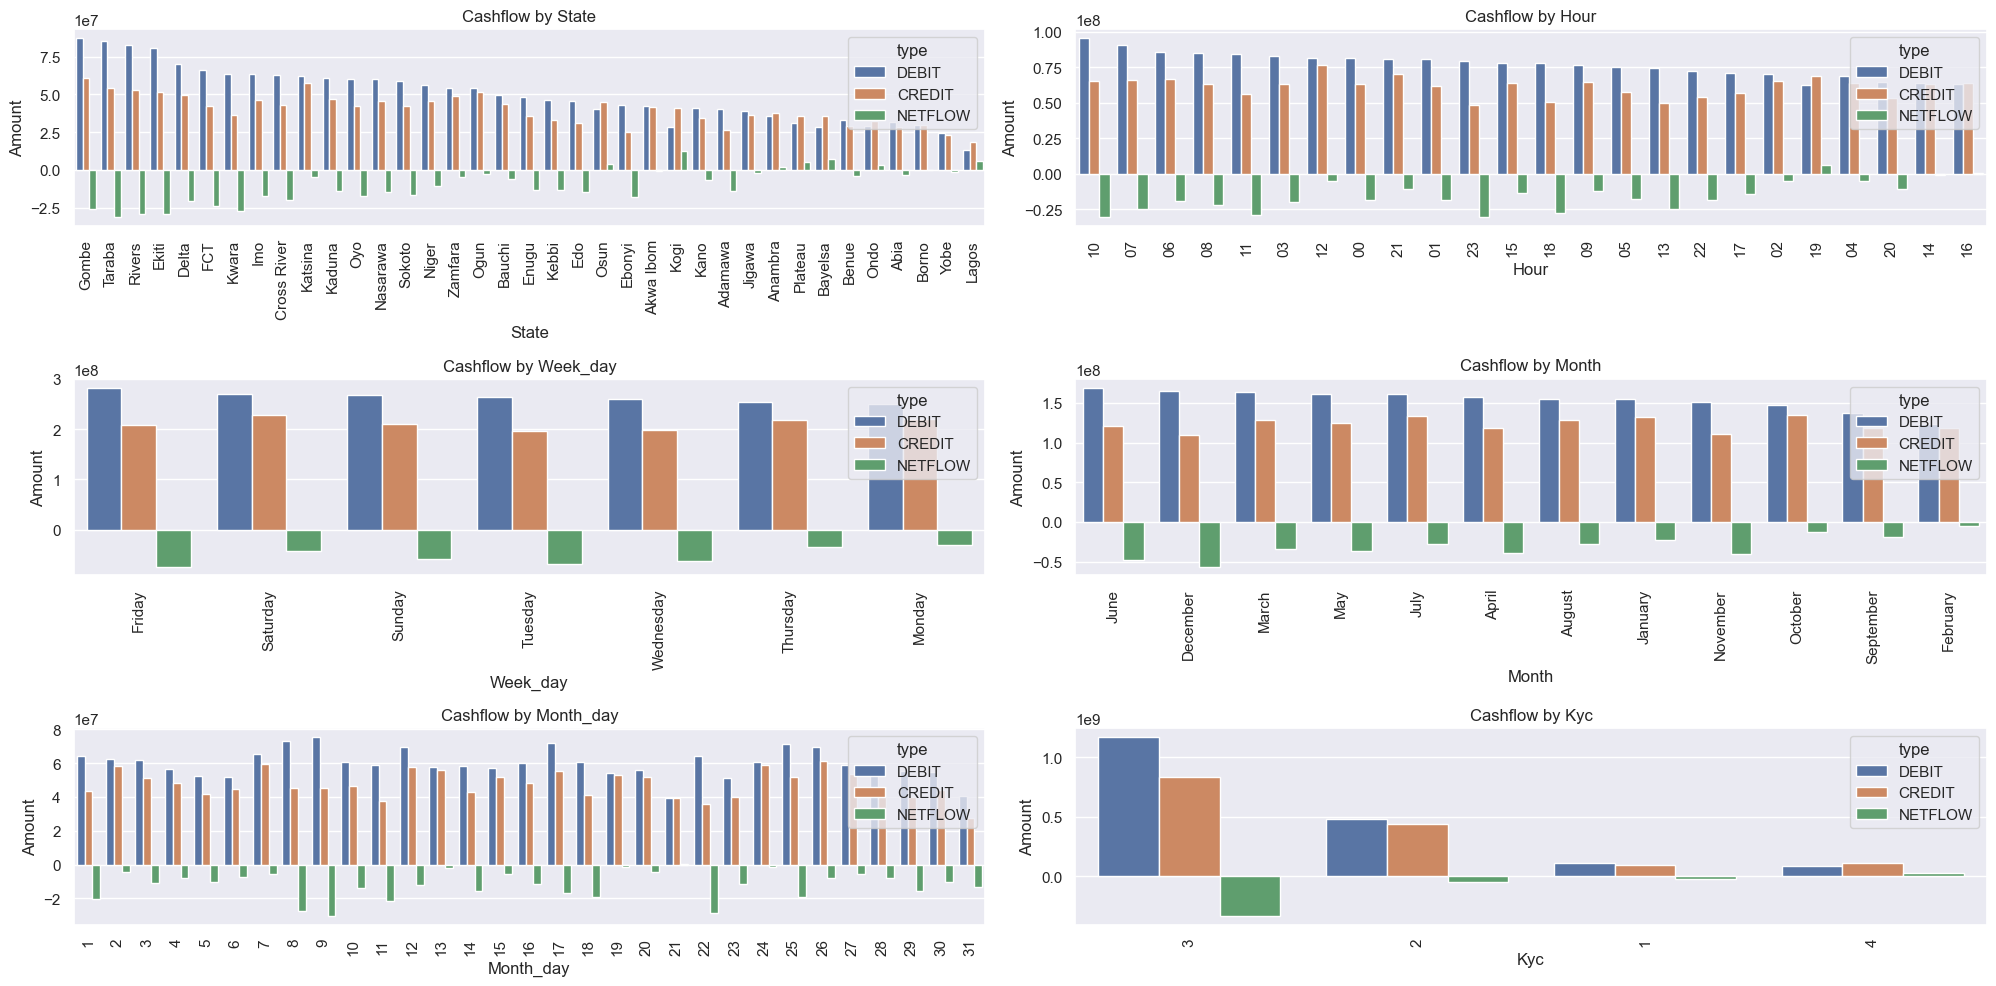

In [233]:
# Plot cashflow
analyst.plot_cashflow(df_eda, ['state', 'hour', 'week_day', 'month', 'month_day', 'kyc'])

Observing this plot, here are the things that stand out.

- Overall negative `netflow` indicates accross all features

- `Cashflow` varies significantly by `state`, with `Kaduna` & `Ogun` showing no `netflows`.

- There is no decline of activities in `week_day`, `month` or `hour`. The is a little fluctuations in `month_day` however.

#### Distribution of features with type

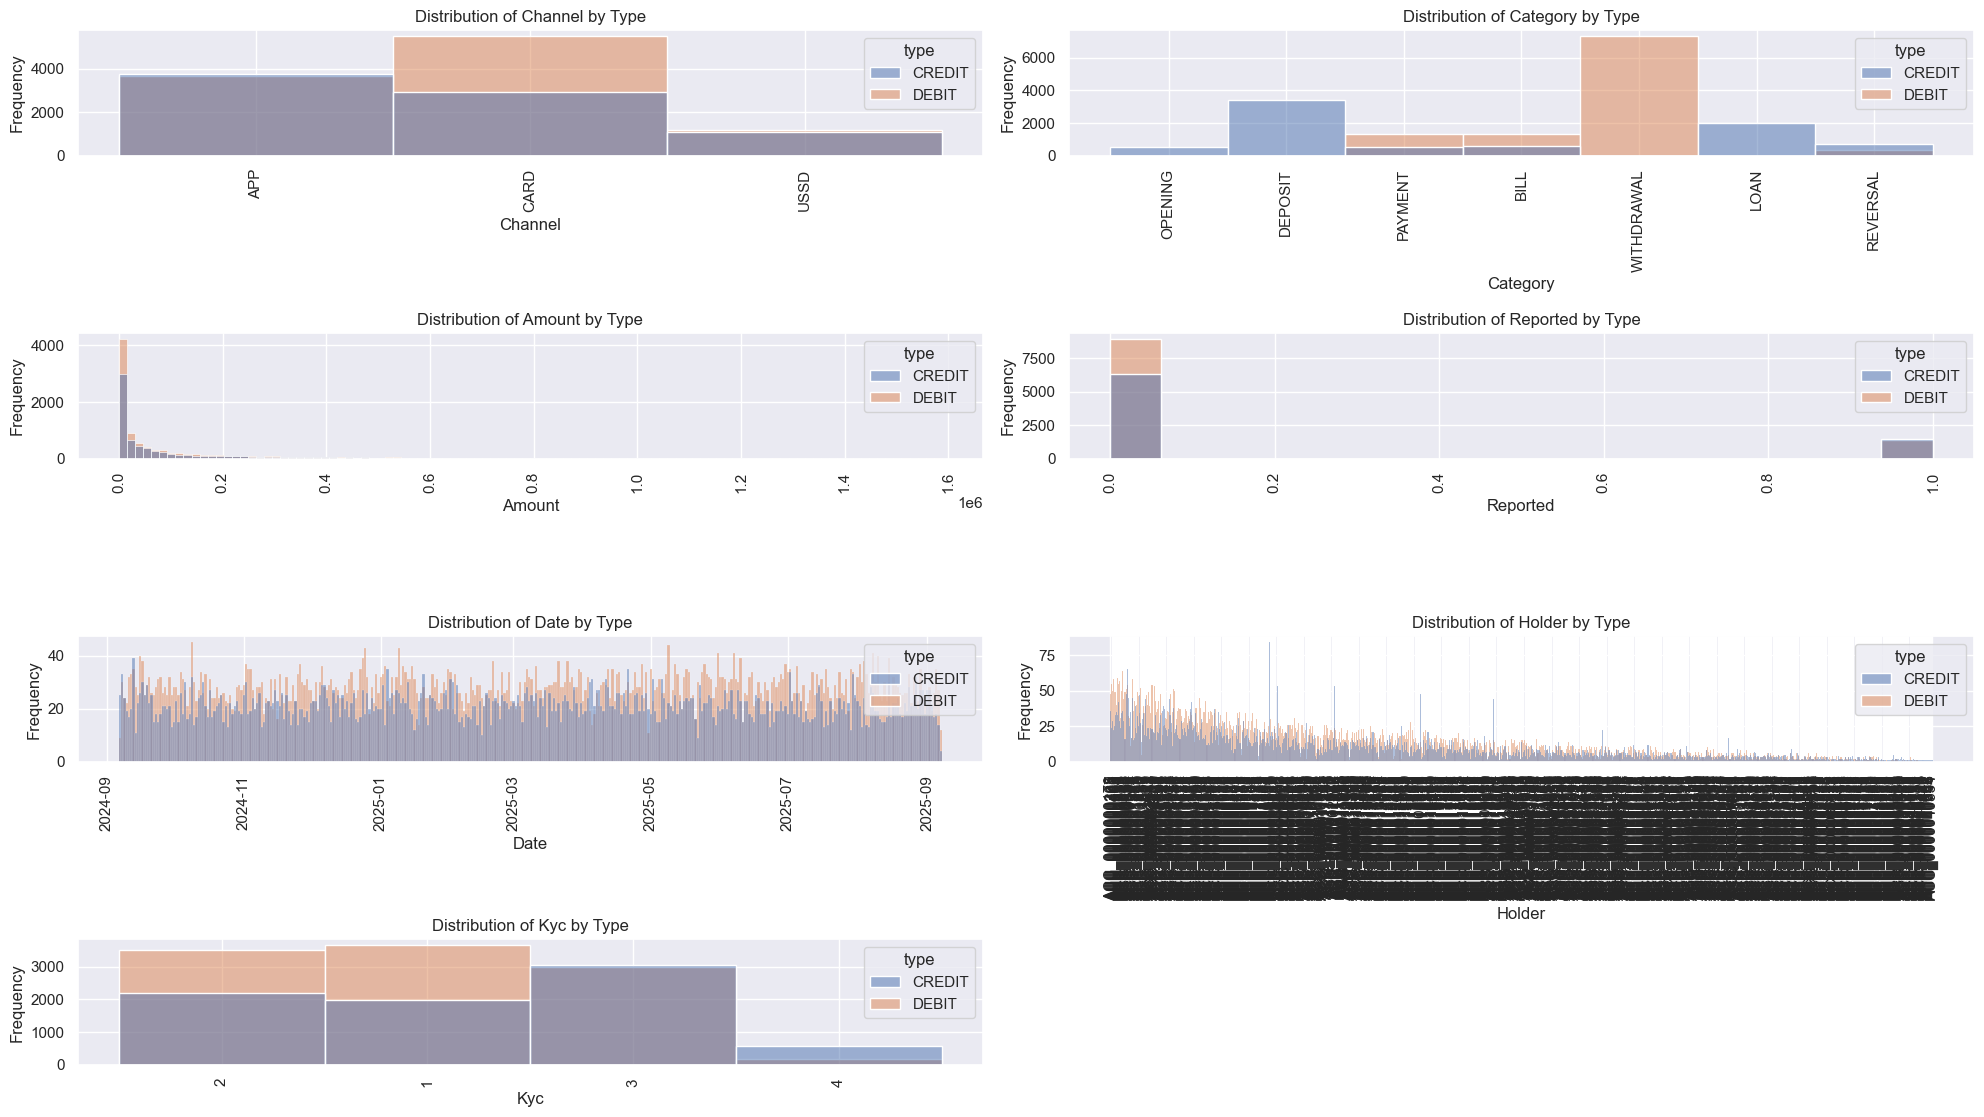

In [234]:
# Plot distribution by type
plt.figure(figsize=(20, 20))
analyst.plot_distribution(df_eda, ['channel', 'category', 'amount', 'reported', 'date', 'holder', 'kyc'], 'type')

Observations:

- There is class inbalance in `category`, it needs the `dimension` to be reduced.

- Accross all features, there is a huge gap in transaction `type`, with `debit` being almost 2x of `credit`.

#### Category Distribution

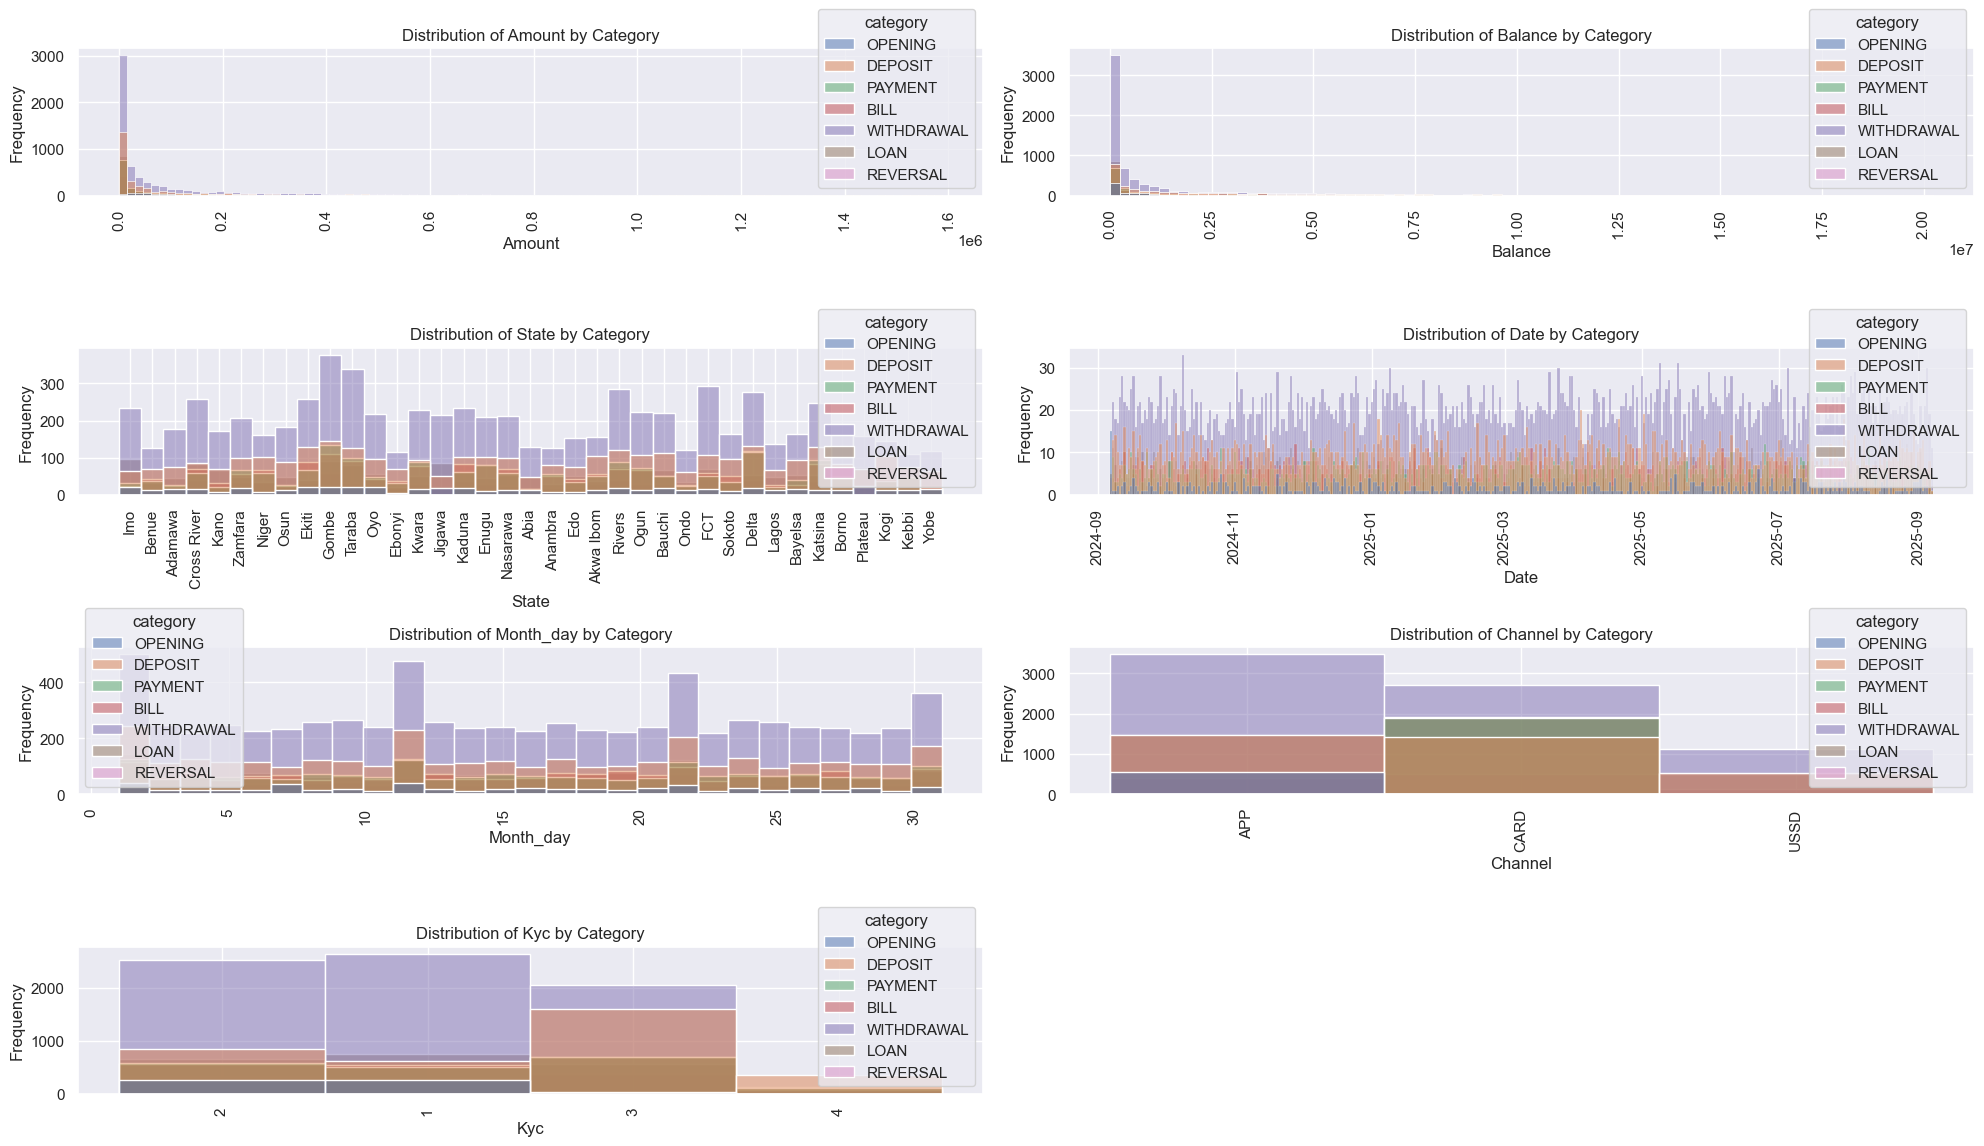

In [235]:
# Plot distribution by category
plt.figure(figsize=(20, 20))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'date', 'month_day', 'channel', 'kyc'], 'category')

Observations:

- `Amount` and `Balance`: Most transactions, especially withdrawals and deposits, are of low value.

- `Date`: Transaction frequencies show fluctuations over time, with withdrawals and deposits consistently dominant.

- Channel: APP is the primary channels, with APP heavily used for withdrawals and deposits. USSD/CARD is less utilized.

- State: Transaction volumes vary by state, with Gombe and Delter showing high activity.

- Month Day: Transaction frequencies are relatively consistent throughout the month, with no strong daily patterns for any category.

#### Channel Distribution

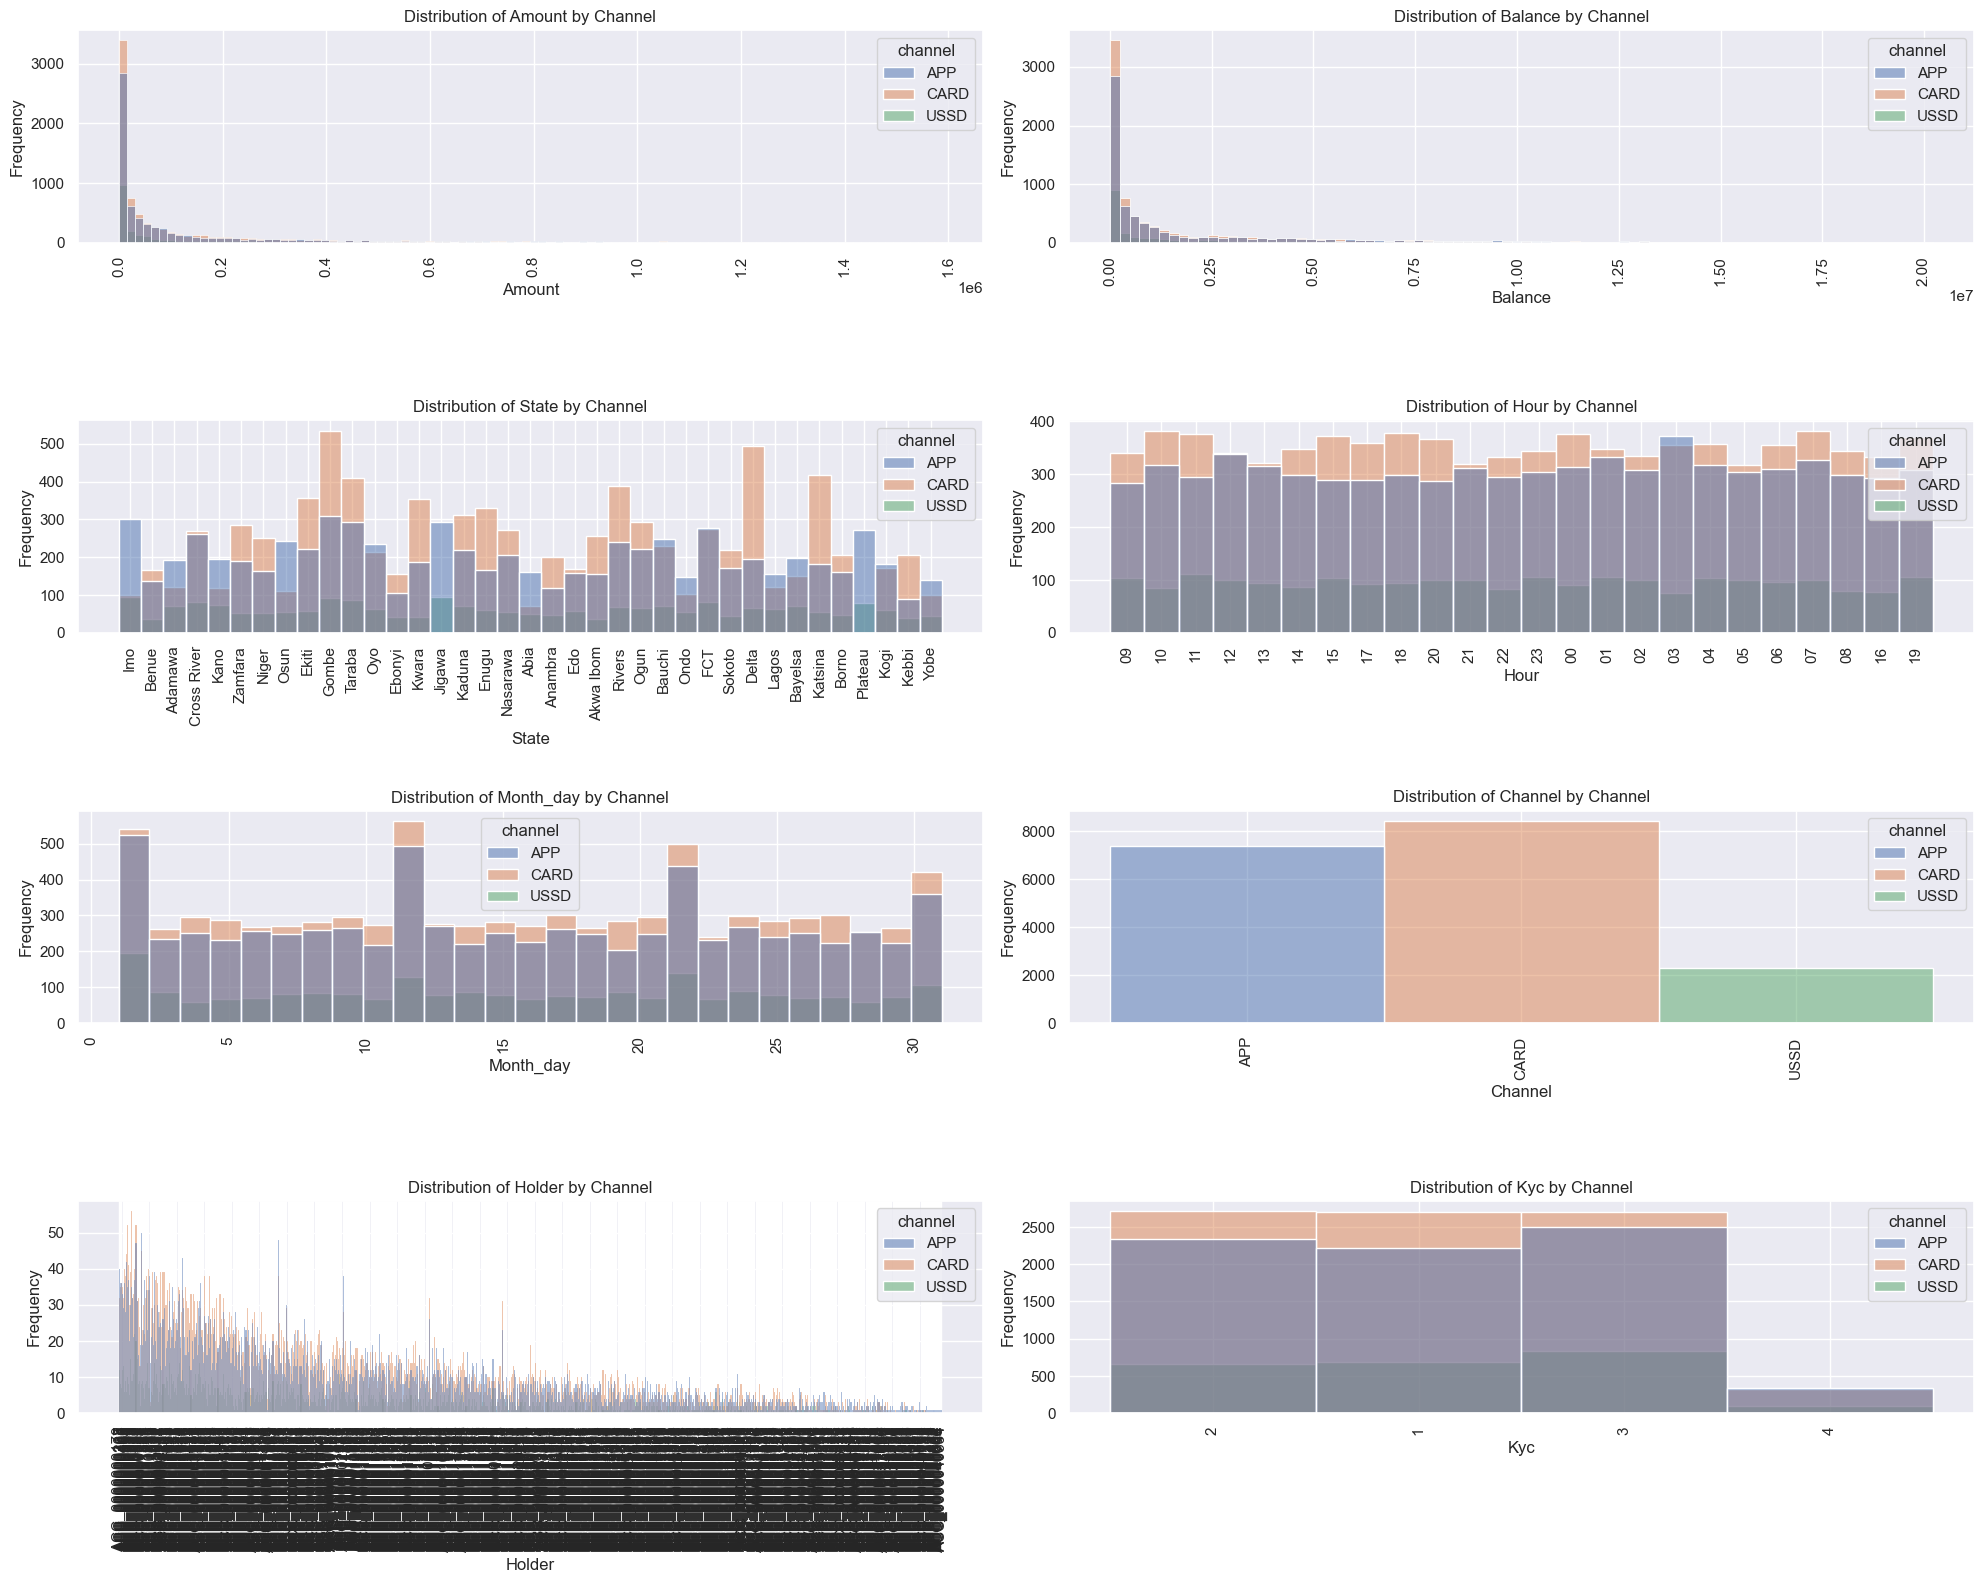

In [236]:
# Plot distribution by category
plt.figure(figsize=(20, 30))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'hour', 'month_day', 'channel', 'holder', 'kyc'], 'channel')

Observations: 

- Amount/Balance: Lower transaction amounts are most frequent.

- Hour: Activity levels fluctuate throughout the day for each channel.

- Month Day: Usage patterns differ across days of the month.

- Overall Channel Usage: A clear comparison of the total volume handled by each channel.

- Holder: Shows how different user relate to specific channels, with Card being the favourite option.

#### Reported Distribution

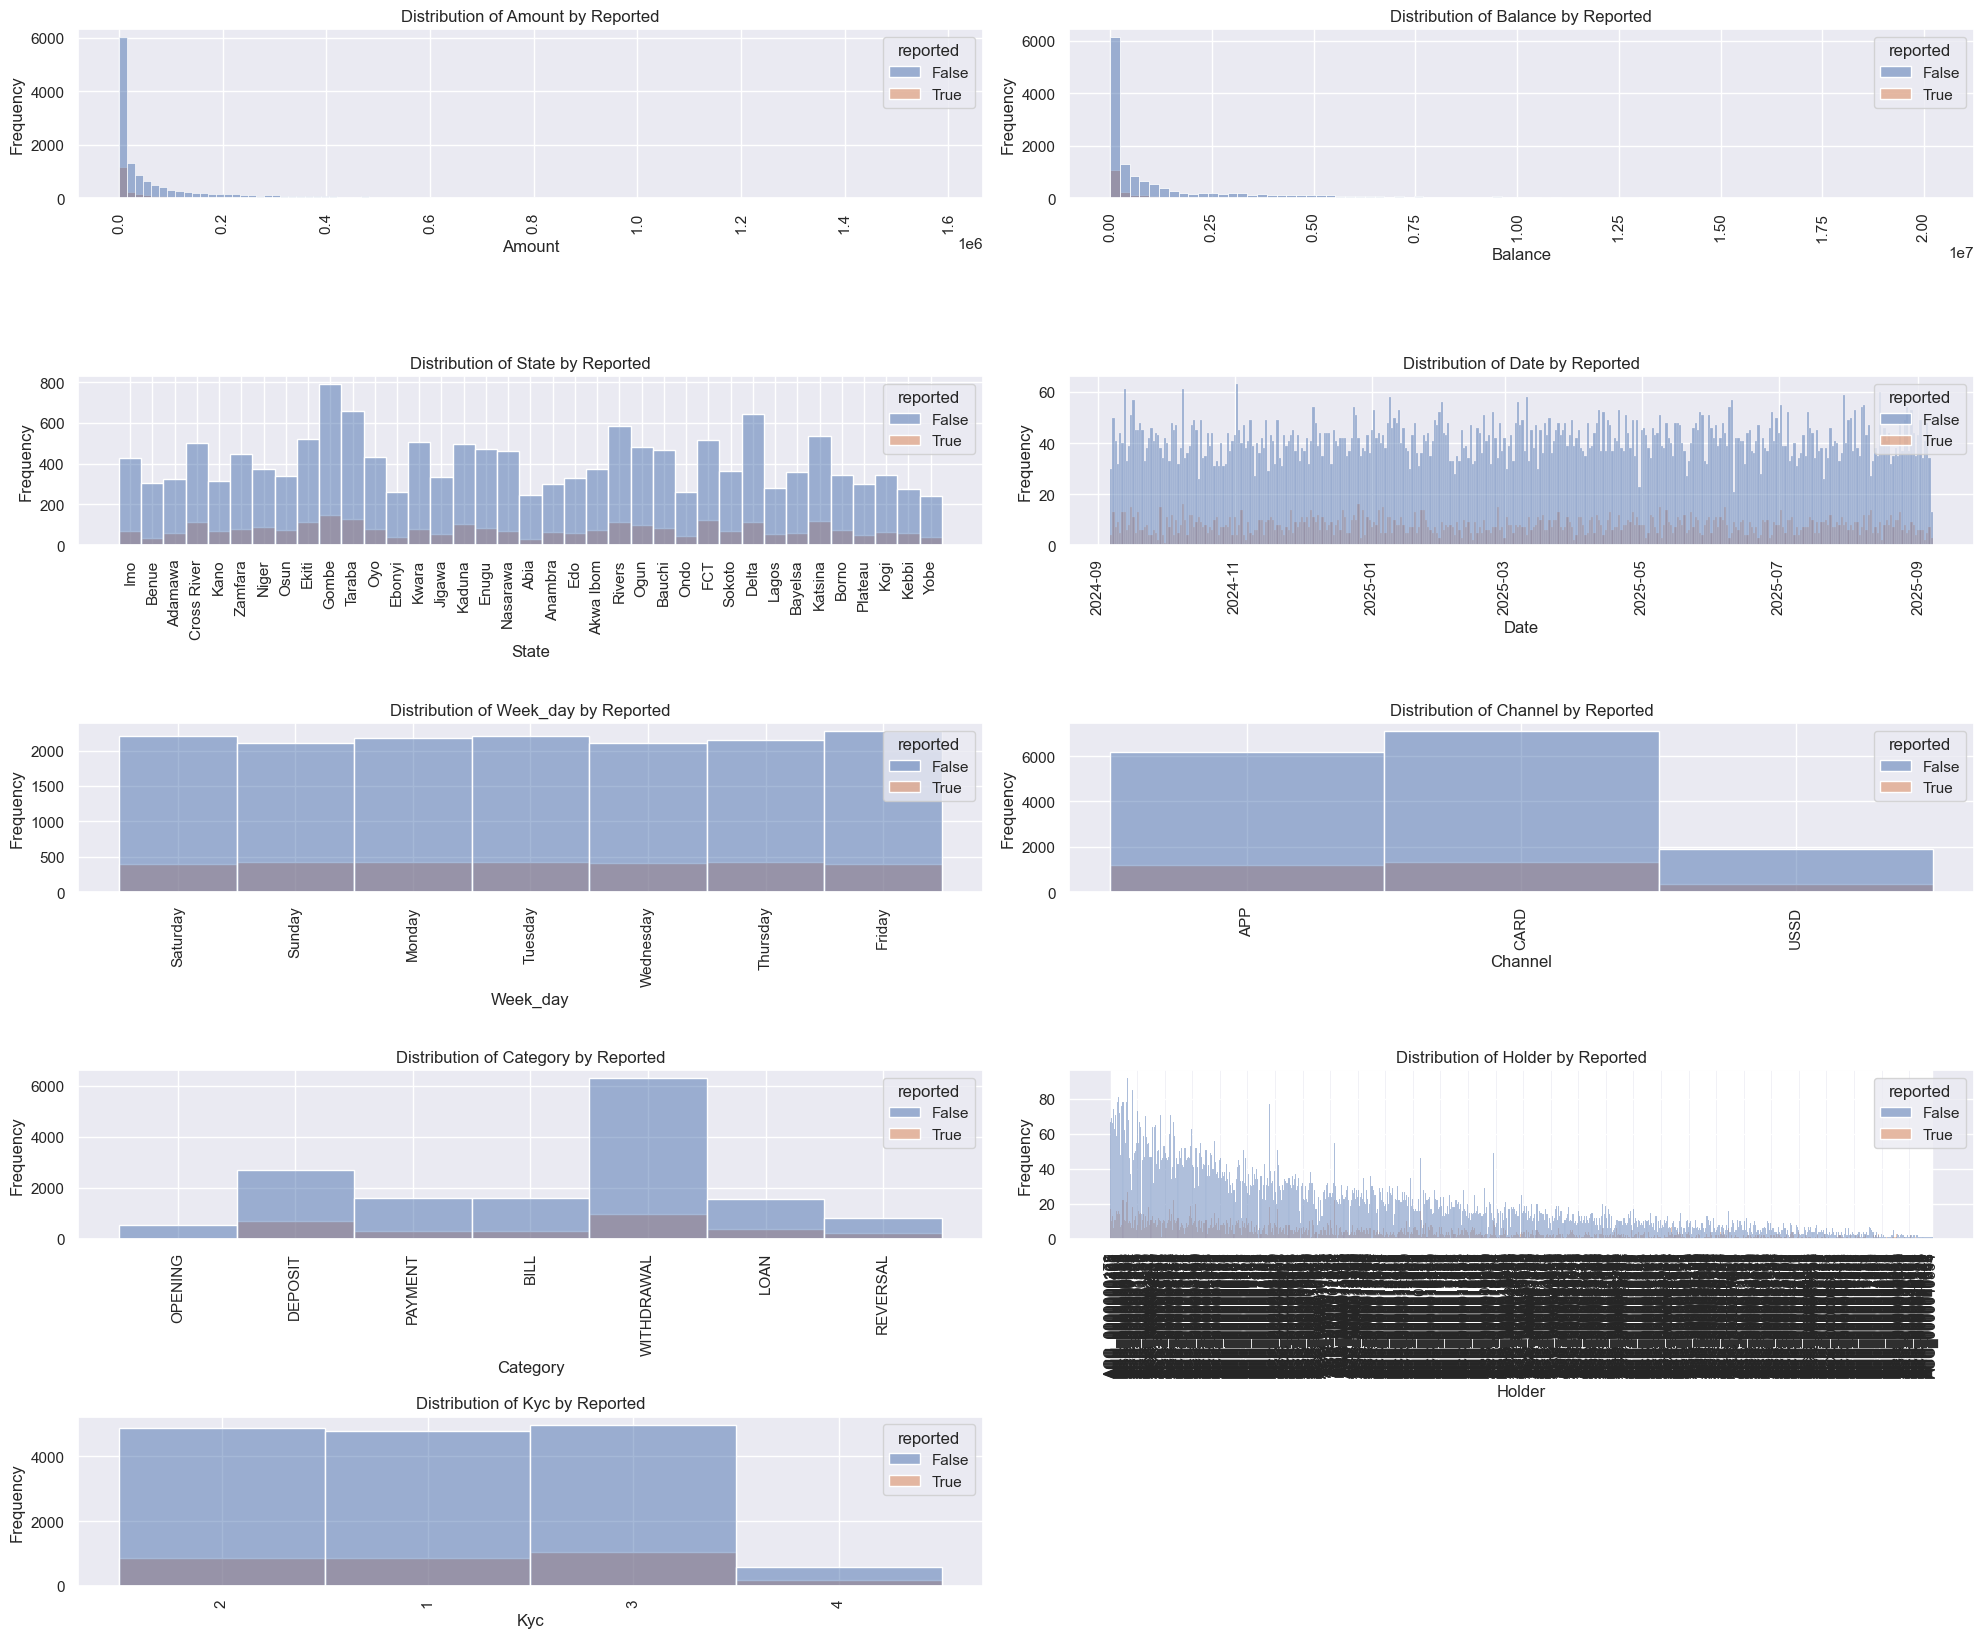

In [237]:
plt.figure(figsize=(20, 30))
analyst.plot_distribution(df_eda, ['amount', 'balance', 'state', 'date', 'week_day', 'channel', 'category', 'holder', 'kyc'], 'reported')

- The majority of transactions involve small amounts, with frequency sharply decreasing as the transaction amount increases.

- Similarly, most account balances are relatively low, with fewer accounts holding large balances.

- "Withdrawal" transactions is significantly more frequent than other categories like "Deposit" or "Payment."

- "Opening" transactions are the least frequent among the displayed categories.

- Transactions are consistently distributed across the week, indicating a similar level of activity throughout the week.

- Mobile banking channels ("APP") appear to be the most frequently used for transactions, followed by "CARD" and then "USSD."

- Transaction frequency is relatively low for most account holders, with a few holders showing a higher frequency of transactions.

- The frequency of transactions over date shows fluctuations but no clear, strong upward or downward trend across the observed period.

- Certain states like Gombe, and Delta show a higher frequency of transactions compared to others like Abia.

### Spread of Data

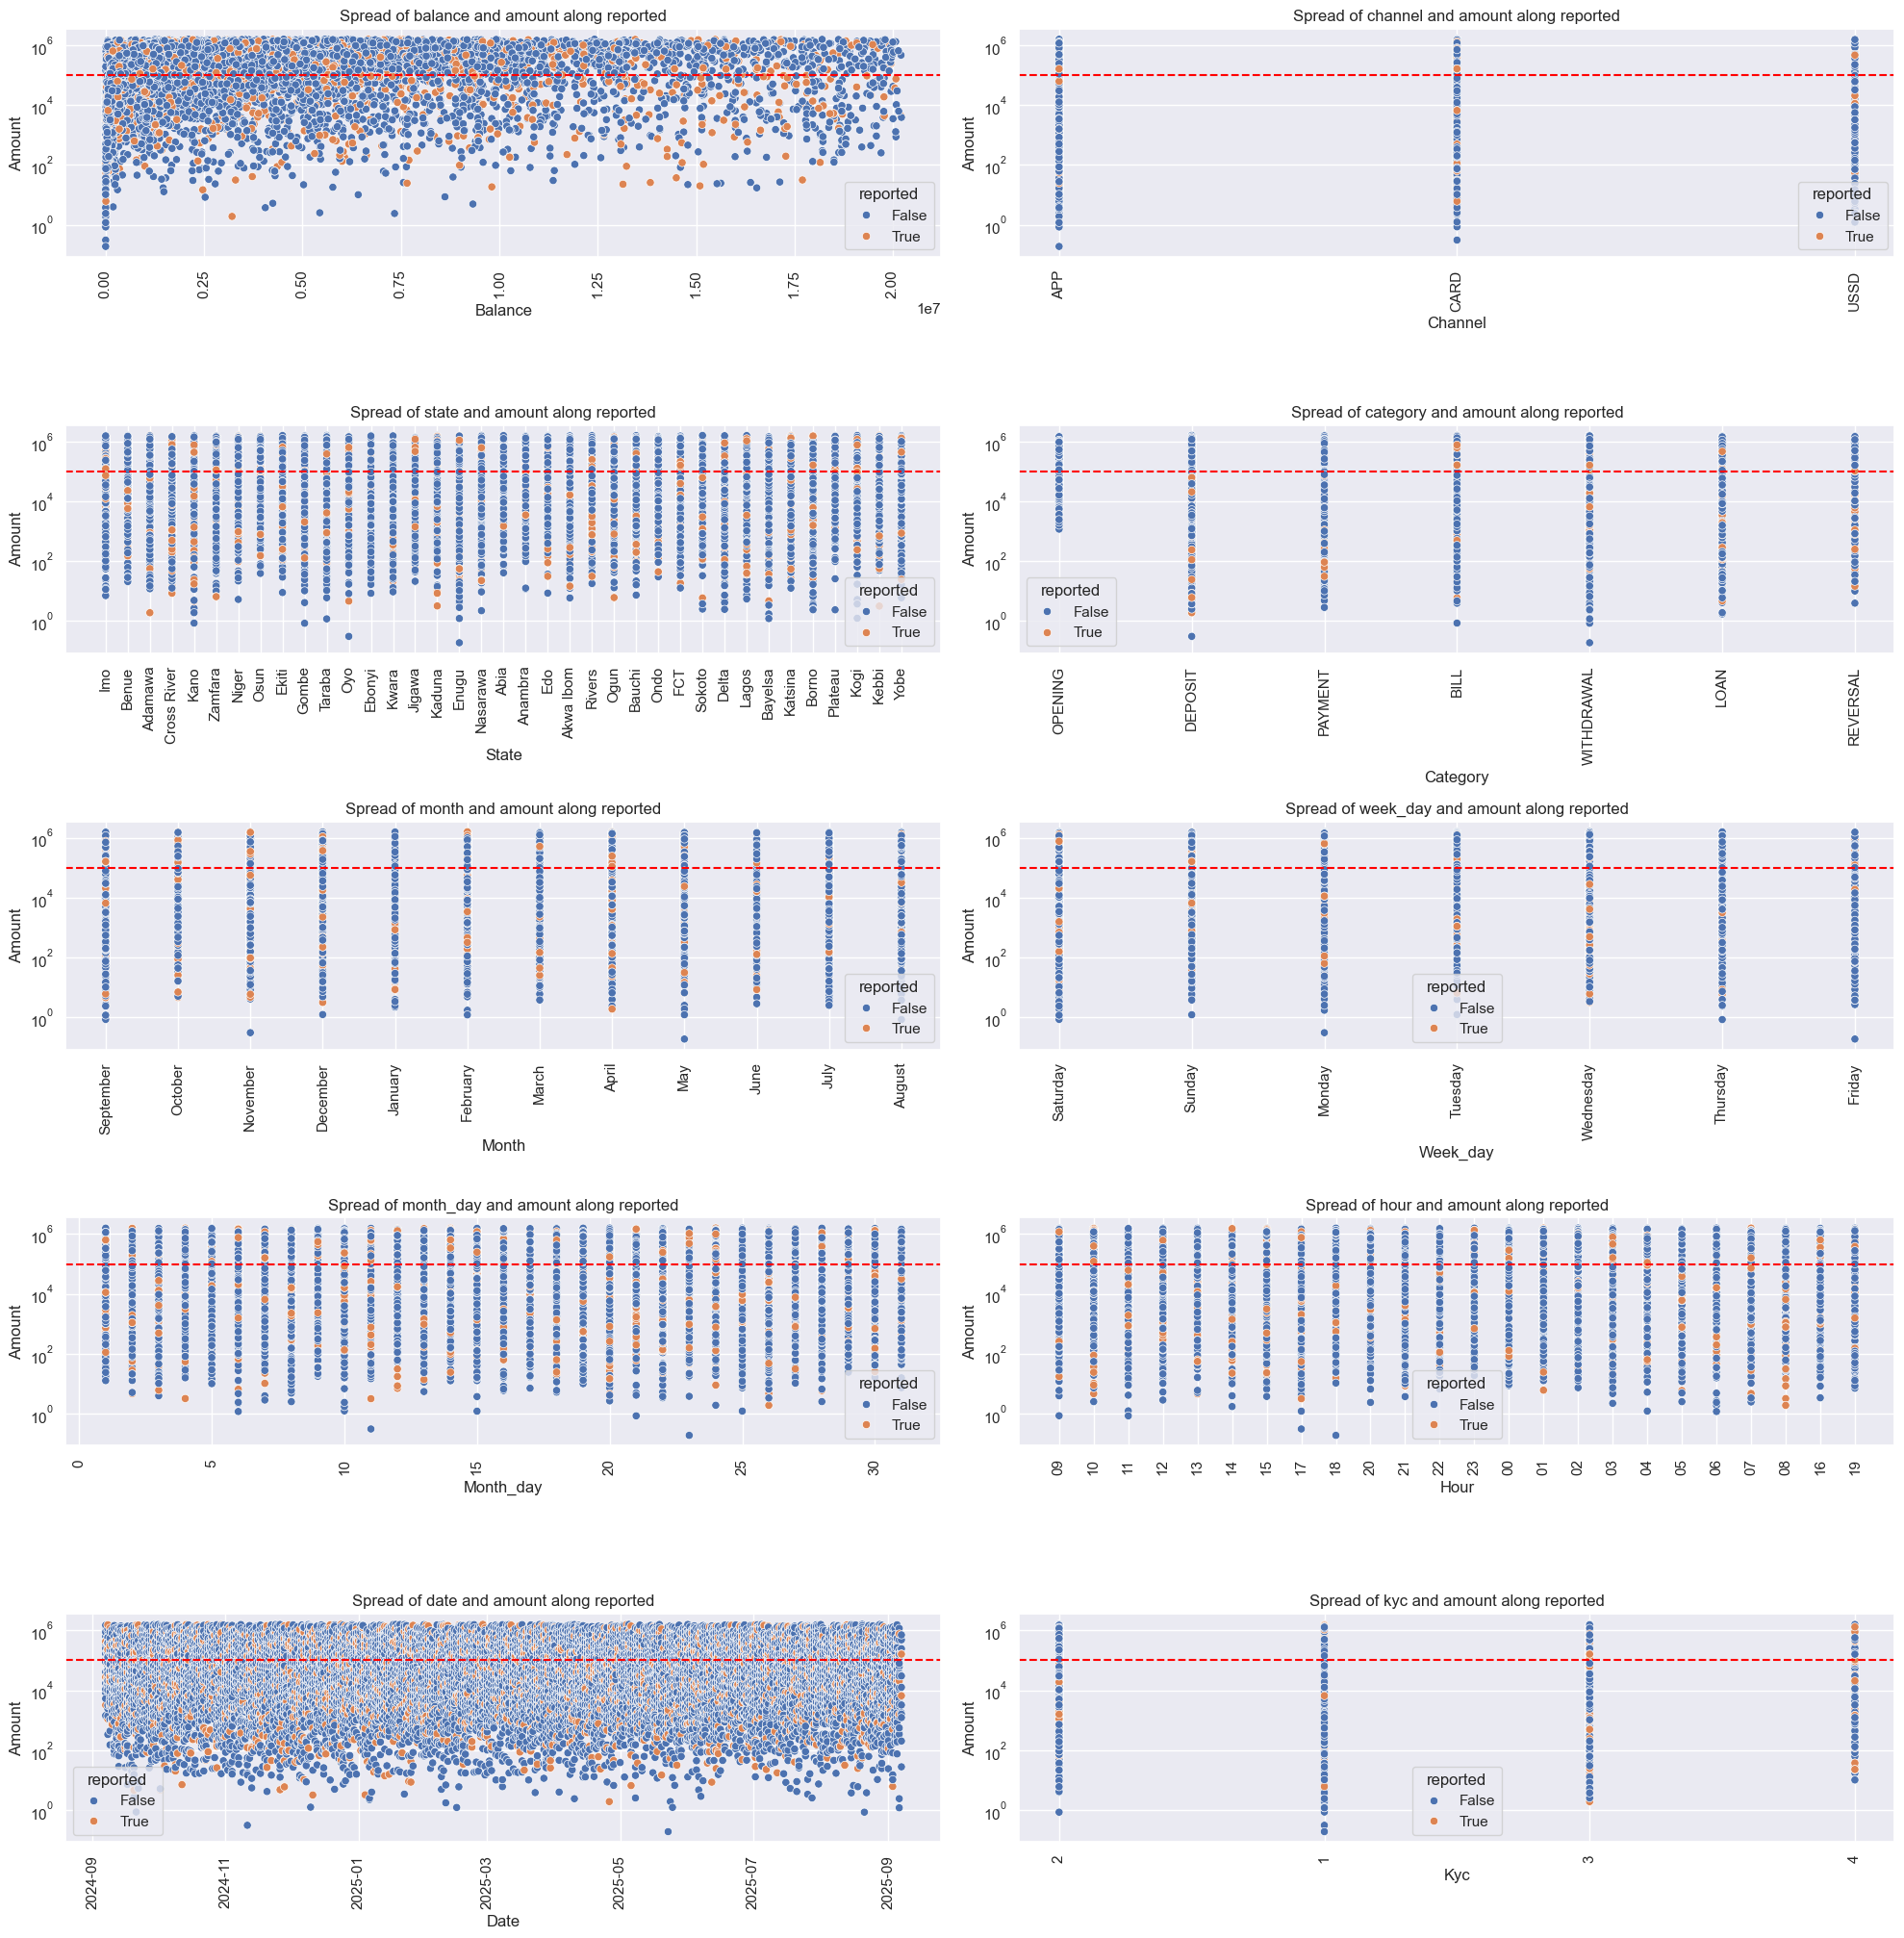

In [238]:
# Visualize the spread of the data
plt.figure(figsize=(20, 40))
analyst.plot_scatter(df_eda, 'amount', ['balance', 'channel', 'state', 'category', 'month', 'week_day', 'month_day', 'hour', 'date', 'kyc'], 'reported', 1e5)

Observations:

- No opening category of transaction was reported

- Level 3 KYC has the least reported transaction

- Transactions are not reported as much on weekends.

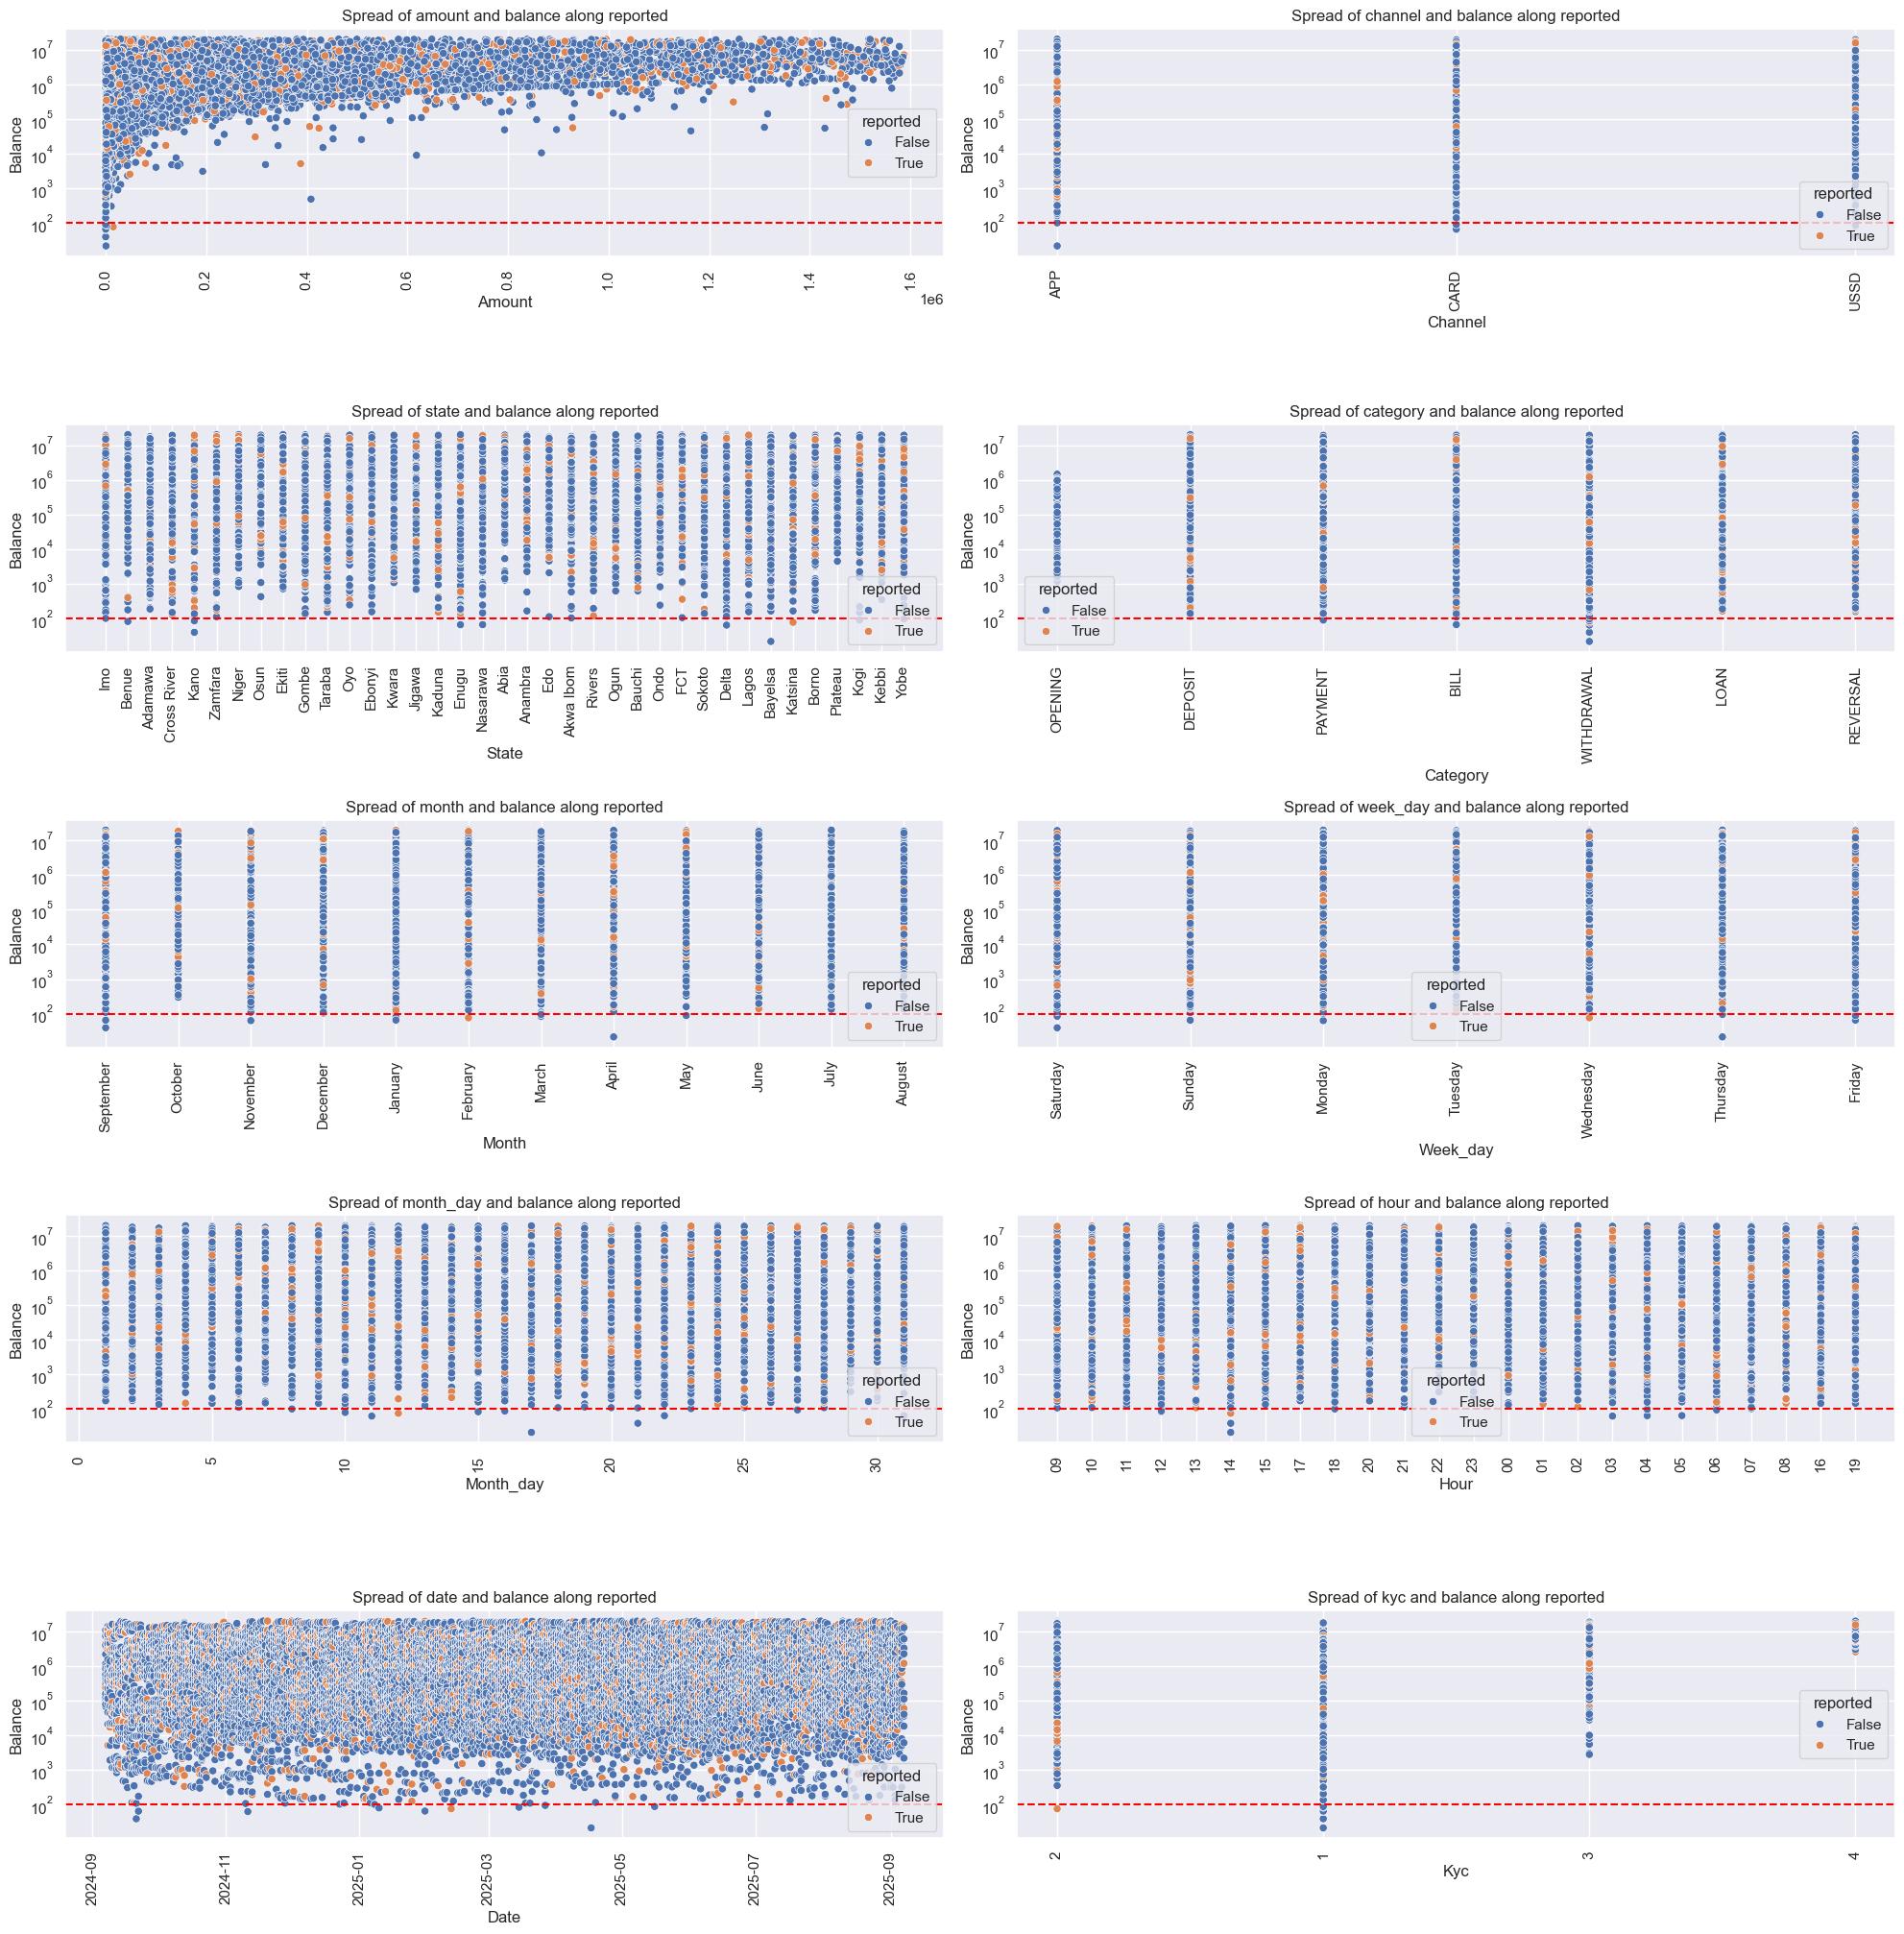

In [239]:
plt.figure(figsize=(20, 40))
analyst.plot_scatter(df_eda, 'balance', ['amount', 'channel', 'state', 'category', 'month', 'week_day', 'month_day', 'hour', 'date', 'kyc'], 'reported', 1e2)

Observations:

- There is an even spread of reported transactions accross all the features.

### Trend Analysis

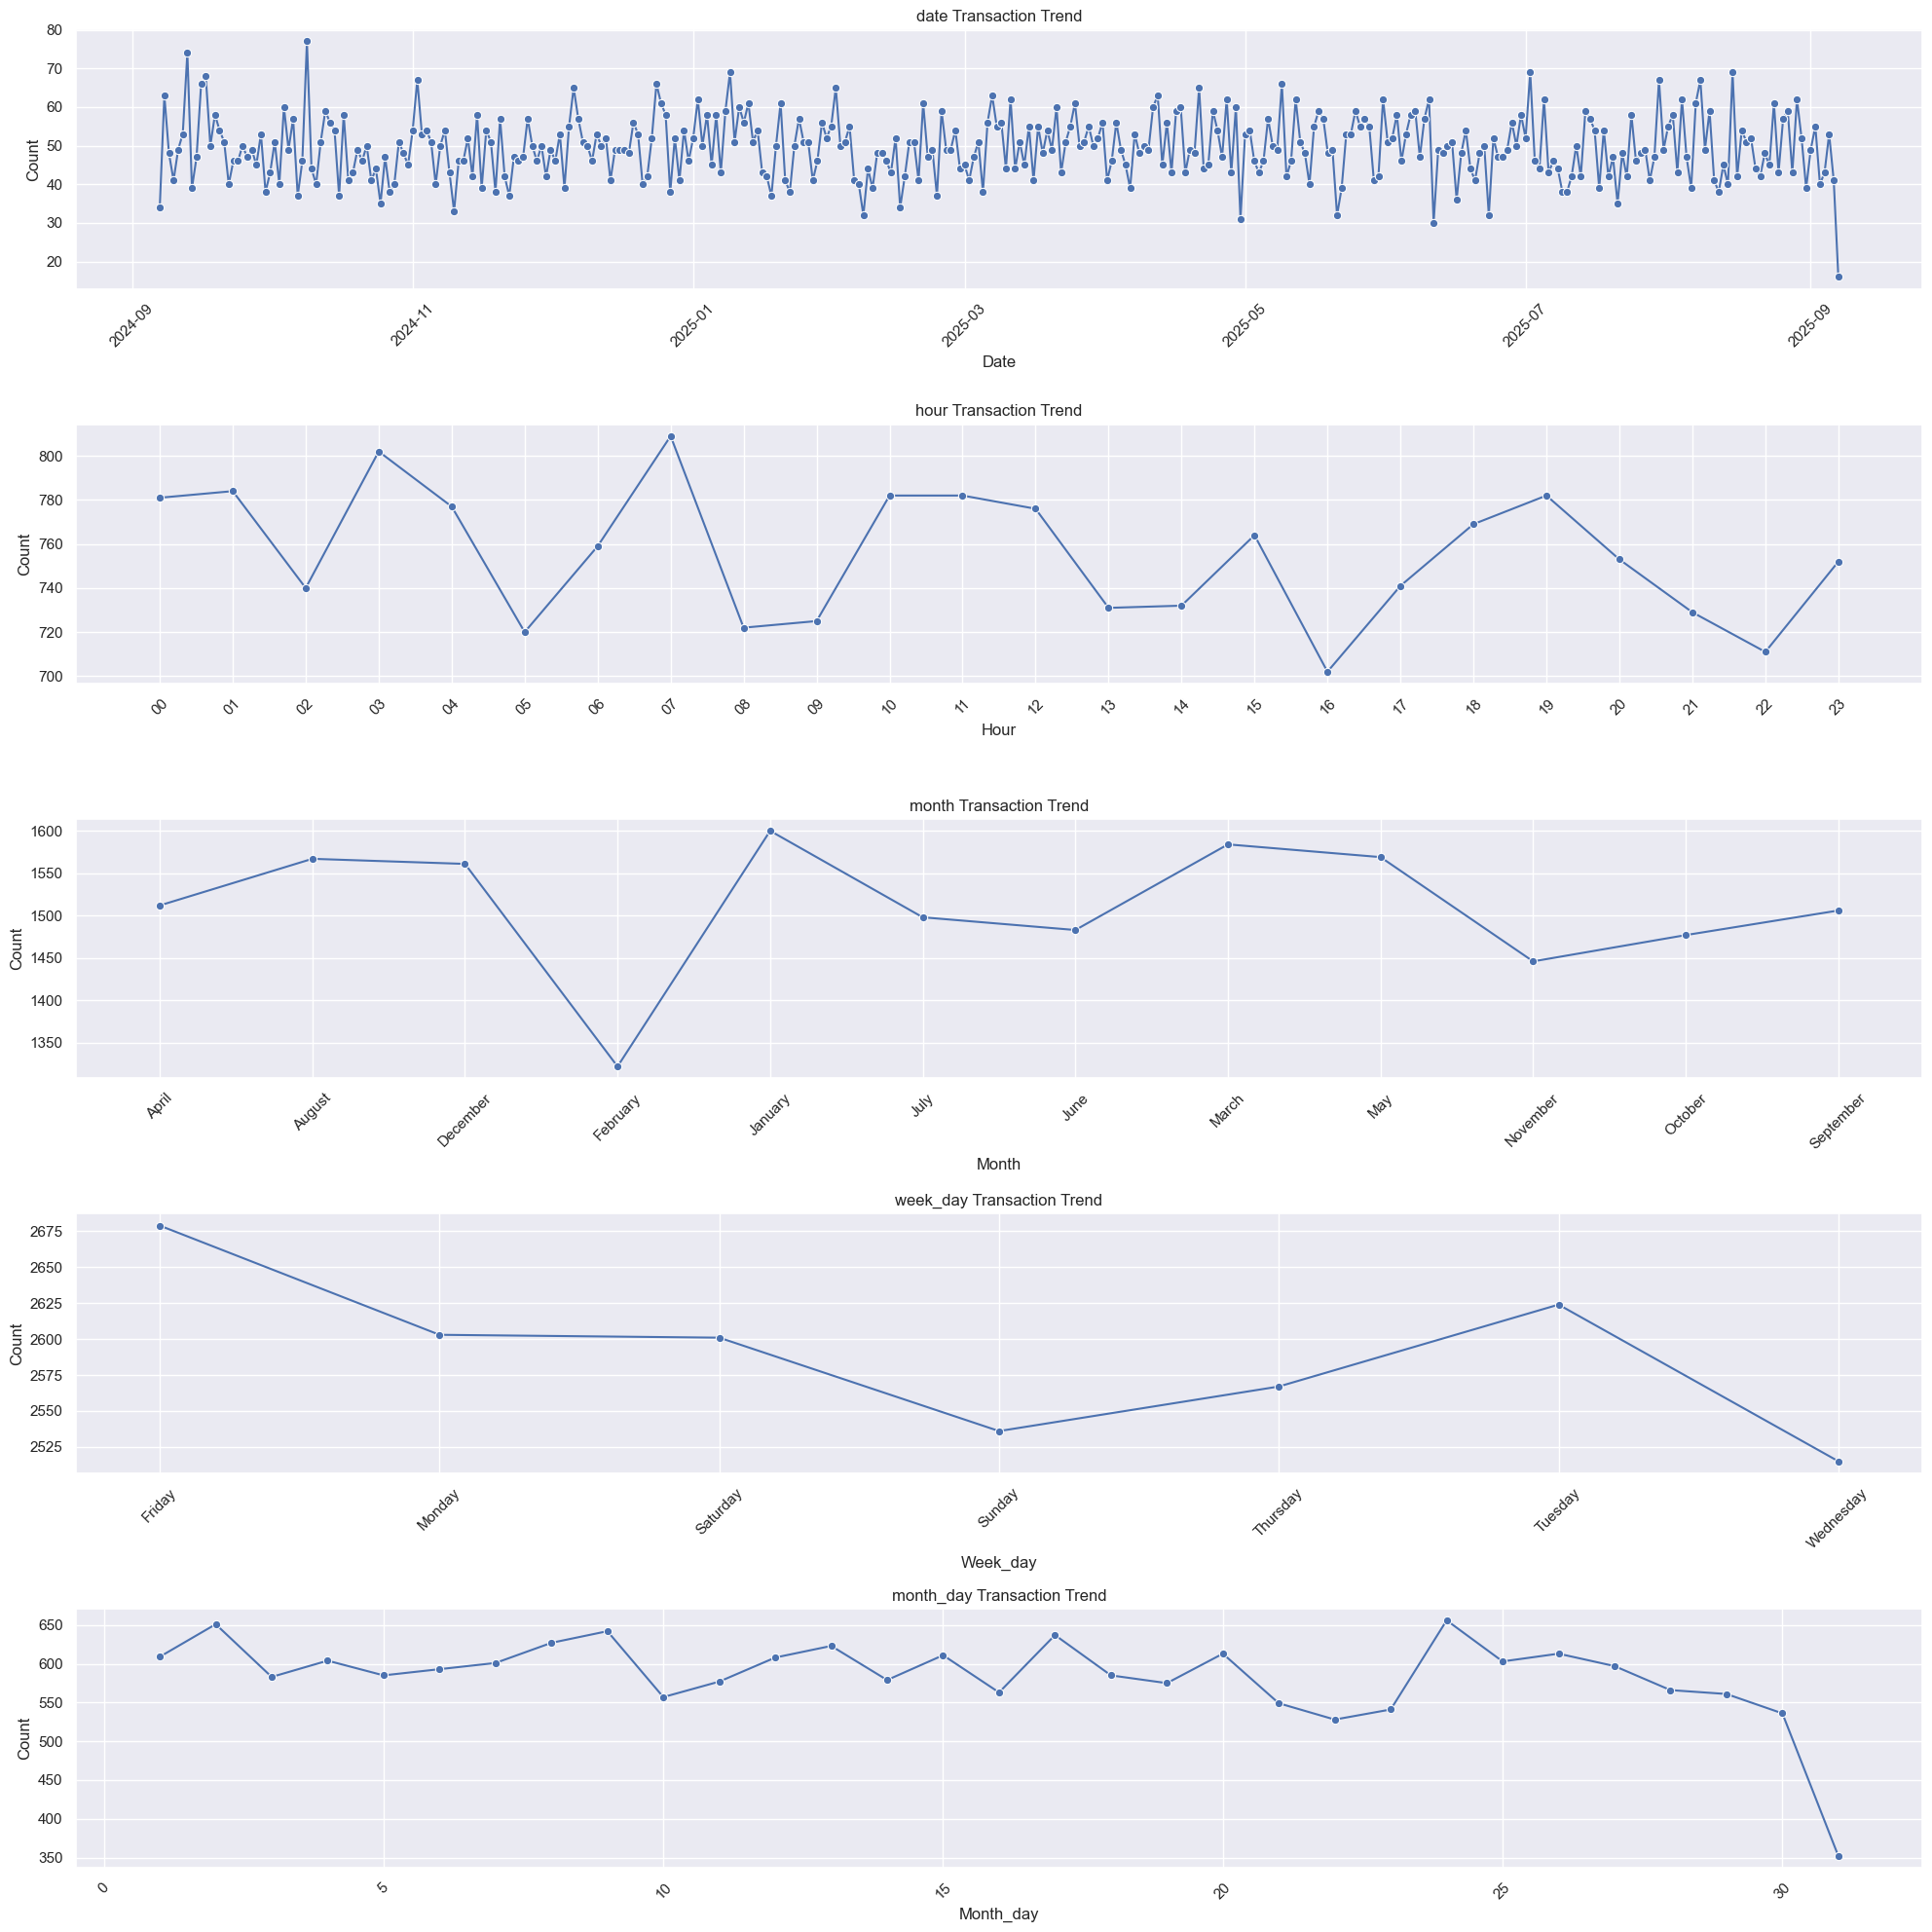

In [240]:
analyst.plot_trend(df_eda, ['date', 'hour', 'month', 'week_day', 'month_day'])

Observations:

- `7am` is the most active of all the hours.
- `January` is a very active month.
- `Friday` is the most active off all days with Monday as the least. 

In [241]:
df_eda.to_csv(f'../datasets/analyzed_transactions.csv', index=False)

## Insights and Findings
    
- Key Patterns
- Anomalies
- Business Insights
- Recommendations


### Key Patterns

- Amount ↔ Balance lockstep: Strong positive correlation; high amounts typically move balances in sync.

- Temporal uniformity: Activity is broadly even by hour/weekday/month.

- Debit & Withdrawal gravity: Debits dominate; Withdrawals are the most frequent category.

- KYC skew: KYC Level 4 heavily deconcentrated; Lower KYC levels are more frequent.

- Geo concentration: Transactions span 37 states; Gombe/Delta emerge as volume hot spots.

### Anomalies

- Heavy right-skew: Amount and balance distributions contain many high-end outliers (IQR-trimmed).

- Nonce integrity edge cases: Reversal/transfer pairings must be 1/2/4 events, flag any other counts.

- Cashflow dips: Net outflow pockets (e.g., KYC 3 cohorts) suggest leakage or behavioral anomalies.

- Device/Channel bursts: Localized spikes by device/channel may indicate scripted or bot-like activity.

- Time cliffs: Spikes in the morning, maybe something fishy is happening.

### Business Insights

- Risk concentration at low KYC: Disproportionate activity with low verification = elevated fraud exposure.

- Operational focus states: Gombe/Delta high volumes merit tailored limits and monitoring rules.

- Channel strategy: APP drives withdrawals; CARD steady for everyday use—tune controls per channel.

- Sparse “reported” labels: Supervised models will be label-starved; lean on anomaly/PU learning.

### Recommendations

- Tiered limits by KYC: Stricter per-txn/day caps and velocity rules for KYC 3; relax for 1,2 and 4.

- Nonce policy checks: Enforce 1/2/4-event schemas; auto flag any nonce with unexpected counts.

- Adaptive outlier bounds: Maintain IQR based caps per state/channel/hour; update weekly.

- Behavioral features: Add rolling velocity, peer group z-scores, and device consistency signals.

- Modeling stack: Use Isolation Forest for prefiltering → Logistic Regression/XGBoost on flagged sets.

- Hotspot playbooks: For Yobe/Oyo, deploy tighter ATM/POS withdrawal thresholds + step-up KYC.

- Explainability & feedback: SHAP for triage; analyst feedback loops to enrich “reported” labels.

- Real-time guardrails: Rule combos (large amount × new device × late hour × cross-state) = hard blocks.